## Résolution du 2e travail personnel : " Traffic flow ".

---

Binôme : Khaled Ibrahim & Servranckx Christophe.

---

L'objectif de ce nouveau travail personnel est de réussir à modéliser et à décrire le système qu'est le flux de la circulation sur une route à une seule voie.

Pour se faire, nous nous plaçerons ici dans le cas d'un trafic instable pour lequel nous pouvons utiliser l'équation de convection non-linéaire de la densité de voiture. En outre, nous procèderons à 2 simulations distinctes afin de mieux comprendre l'évolution de notre système sous différente conditions initiales (CI) et aux bords/limites (CL) pour la densité de trafic. Nous aurons ainsi les 2 ensemble de conditions suivant :

Première simulation :

$$
\left.
    \begin{array}{ll}
         & x = numpy.linspace(0,L,nx)\\
         & rho0  = numpy.ones(nx).10\\
         & rho0[10:20]  = 50\\
    \end{array}
\right \} \text{  (CI) }
$$


$$
\left.
    \begin{array}{ll}
         & \rho(0,t) = 10
    \end{array}
\right \} \text{  (CL)}
$$

Seconde simulation :

$$
\left.
    \begin{array}{ll}
         & x = numpy.linspace(0,L,nx)\\
         & rho0  = numpy.ones(nx).20\\
         & rho0[10:20]  = 50\\
    \end{array}
\right \} \text{  (CI) }
$$


$$
\left.
    \begin{array}{ll}
         & \rho(0,t) = 20
    \end{array}
\right \} \text{  (CL)}
$$

Commençons sans plus tarder par le traitement de nos équations.

##### 1. Réécriture de l'équation de convection non-linéaire de la densité de voiture & discrétisation. 
---

#### 1.1 Un bref rappel théorique.

---

Dans la partie théorique de l'énoncé de ce travail, nous avons vu que le flux, instable, de trafic peut-être modélisé comme la convection non-linéaire de la densité de voiture. Il en découllait donc pour notre problème:

\begin{align}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0\\
\end{align}


où

\begin{align}
F = V(\rho) \rho = V_{max} \rho \left( 1- \frac{\rho}{\rho_{max}} \right)
\end{align}

Avec,

$$
\left\{
    \begin{array}{ll}
        &.V  \text{, la vitesse de circulation (en km/h)} \\
        &.V_{max}  \text{, vitesse maximale que peuvent atteindre les}\\
        &\hspace{0.9cm}  \text{voiture lorsque $\rho→0$}\\
        &.\rho \text{, la densité de trafic, c'est à dire le nombre de voiture}\\
        &\hspace{0.9cm}  \text{par unité de longueur de la route (en voiture/km)}\\
        &. \rho_{max},  \text{la densité maximale atteinte lorsque les voiture}\\
        &\hspace{0.9cm}  \text{sont "pare-chocs contre pare-chocs", et à laquelle}\\
        &\hspace{0.9cm}  \text{correspond une vitesse nulle}
    \end{array}
\right.
$$

En appliquant la $règle\ de\ la\ chaîne^{1}$ sur l'équation (1), nous obtenons alors: 

\begin{align}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0\\
\end{align}


Nous allons maintenant passé à la discrétisation (afin de pouvoir résoudre numériquement notre problème) de nos équations. En effet, nous n'allons pas uniquement discrétisé l'équation (3) mais nous allons également discrétisé l'équation (1) et ce dans le but de comparé les résultats obtenu par ces deux discrétisations différentes et d'en tirer d'éventuelles conclusions.

---
###### [1]. La règle de dérivation des fonctions composées ou "règle de la chaîne" s'énonce comme suit : Soit f une fonction dérivable en a et g dérivable en f(a). Alors la composition g o f est dérivable en a et on a : $(g◦f)'(a) = g'(f(a)) f'(a)$ ou dans la notation de Leibniz si $y=f(x)$ et $u=g(y)$ alors : $\frac{du}{dx}=\frac{du}{dy} \frac{dy}{dx}$


#### 1.2 Discrétisations. 

---

* Discrétisation de l'équation  $
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0$ :

---
Pour se faire, nous calculons tout d'abord la dérivée $\frac{\partial F}{\partial \rho}$. Nous pourrions calculer cette dérivée à la main mais nous nous proposons d'utiliser ce que nous avons appris au cours du dernier notebook de la série *Space and Time — Introduction to Finite-difference solutions of PDEs*, e.g. l'emplois de l'une des fonctionnalités proposées par $sympy^{2}$ : le calcul d'une dérivée partielle. 

---
###### [2] . Sympy est une librairie pour python qui propose de nombreuse fonctionnalités similaires à celle proposée par Mathematica tel que le calcul de dérivée, d'integrale, etc.

Commençons donc par importer la librairie sympy.

In [1]:
# Import de la libraire.
import sympy

# Permet le renvois des résultats dans le style "LaTeX".
from sympy import init_printing
init_printing()

Définissons à présent nos variables, l'expression de F (donnée par l'équation (2) ) et calculons enfin sa dérivée par rapport à $\rho$.

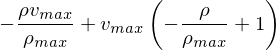

In [2]:
# On définit nos variables.
v_max, rho, rho_max = sympy.symbols('v_max, rho, rho_max')

# Expression de F.
F = v_max*rho*(-(rho/rho_max)+1)

# Calcul de la dérivée.
Fprime = F.diff(rho)

# Affichage du résultat.
Fprime

Ce qui est le même résultat que celui obtenu à la main si nous réexprimons ceci en mettant $v_{max}$ en évidence et en simplifiant quelque peu l'expression:


$\hspace{2.5cm}\frac{- \rho v_{max}}{\rho_{max}}+ v_{max} \left( - \frac{\rho}{\rho_{max}}+1 \right)$ → $v_{max} \left( 1- \frac{2 \rho}{\rho_{max}} \right)$

Ainsi, nous avons obtenu grâce à sympy :

\begin{equation}
\frac{\partial F}{\partial \rho} = v_{max} \left( 1- \frac{2 \rho}{\rho_{max}} \right) 
\end{equation}

Et l'équation (1) devient alors :

\begin{equation}
\frac{\partial \rho}{\partial t} + v_{max} \left( 1- \frac{2 \rho}{\rho_{max}} \right)  \frac{\partial \rho}{\partial x} = 0\\
\end{equation}

Nous pouvons à présent passer à la discrétisation de notre equation de convection. Pour se faire, nous utilisons comme demandé dans l'énoncé de ce travail personnel, la *forward-difference* pour la dérivée par rapport au temps et la *backward-difference* pour la dérivée par rapport à l'espace (ici, par rapport à x comme nous travaillons avec une équation à 1 dimension).

Pour rappel, les discrétisations *forward-difference* et *backward-difference* de la dérivée partielle $\frac{\partial u}{\partial x}$ (par exemple) sont données par :

* Forward-difference: si on utilise les points $x_i$ et $x_i + \Delta x$ alors la dérivée devient : $\frac{\partial u}{\partial x} \approx \frac{u(x_{i+1})-u(x_i)}{\Delta x}$.
* Backward-difference: si on utilise les points $x_i$ et $x_i- \Delta x$ alors la dérivée devient : $\frac{\partial u}{\partial x} \approx \frac{u(x_i)-u(x_{i-1})}{\Delta x}$.

Donc en appliquant ces deux discrétisations à l'équation (5) il en découle l'équation suivante:

\begin{equation}\frac{\rho_i^{n+1}-\rho_i^n}{\Delta t} + v_{max} \left( 1- \frac{2 \rho_i^{n}}{\rho_{max}} \right) \frac{\rho_i^n - \rho_{i-1}^n}{\Delta x} = 0, \end{equation}

Où la seule inconnue est $\rho_i^{n+1}$ étant donné nos conditions initiales. En isolant cette inconnue nous obtenons :

\begin{equation}
\rho_{i}^{n+1}= \rho_{i}^{n} - v_{max} \frac{\Delta t}{\Delta x} \left( 1- \frac{2 \rho_{i}^{n}}{\rho_{max}} \right) \left( \rho_{i}^n - \rho_{i-1}^n \right)
\end{equation}

Que nous pouvons maintenant traiter numériquement.

---
* Discrétisation de l'équation $\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0 $:

---

Procédons maintenant à la discrétisation de cette seconde équation. À nouveau, nous utilisons les deux discrétisations demandées (forward & backward). Nous obtenons ainsi :

$$
\left\{
    \begin{array}{}
        \frac{\partial F}{\partial x}  \approx \frac{F_{i}^{n}-F_{i-1}^{n}}{\Delta x}\\
        \frac{\partial \rho}{\partial t}  \approx \frac{\rho_{i}^{n+1}-\rho_{i}^{n}}{\Delta x}
    \end{array}{}
\right.
$$

où
$$
\left\{
    \begin{array}{}
        F_{i}^{n} & = v_{max} \rho_{i}^{n} \left( 1- \frac{\rho_{i}^{n}}{\rho_{max}} \right)\\
        F_{i-1}^{n} & = v_{max} \rho_{i-1}^{n} \left( 1- \frac{\rho_{i-1}^{n}}{\rho_{max}} \right)
    \end{array}{}
\right.
$$

Ainsi si on réintroduit ceci dans l'équation (3) et qu'on isole la seule inconnue $\rho_i^{n+1}$, nous obtenons alors l'équation discrétisée :

\begin{equation}
\rho_{i}^{n+1}= \rho_{i}^{n} - v_{max} \frac{\Delta t}{\Delta x} \left[\rho_{i}^{n} \left( 1- \frac{ \rho_{i}^{n}}{\rho_{max}} \right) - \rho_{i-1}^n\left( 1 - \frac{ \rho_{i-1}^{n}}{\rho_{max}} \right) \right]
\end{equation}

---
##### 2. Résolution du problème suivant la discrétisation de l'équation (1).

---

#### PARTIE A .
---

Comme à notre habitude, nous commençons par importer les librairies "numpy", matplotlib et JSAnimation. Cette dernière sera utile pour "animer nos graphes".

In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous déclarons ensuite nos données pour cette première partie à savoir la vitesse maximale du trafic,la longueur de la route,...

In [4]:
# Déclaration des variables:

v_max = 80       # en km/h
L     = 11       # en km
rho_max = 250    # en voitures/km
nx    = 51       # nombre de point de la grille des positions
dx    = L/(nx-1) # intervalle entre chaque point de la grille
dt    = 0.001    # h

Et nos conditions initiales, e.g. une densité de voiture décrite de la manière suivante:

In [5]:
# Conditions initiales pour la densité de trafic:

x = numpy.linspace(0,L,nx)
rho0A = numpy.ones(nx)*10
rho0A[10:20] = 50

Vérifions à présent que nos conditions initiales ont correctement été initialisées en réalisant le graphique de la densité en fonction de la position.

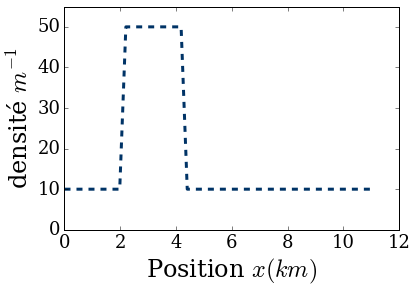

In [6]:
pyplot.ylabel('densité'' ''$m^{-1}$', fontsize=24) # nom de l'axe x & taille de la police
pyplot.xlabel('Position'' ''$x(km)$', fontsize=24) # nom de l'axe y & taille de la police
pyplot.plot(x, rho0A, color='#003366', ls='--', lw=3)
pyplot.tick_params(axis='both',labelsize=18)
pyplot.ylim(0,55);

Comme attendus, la densité de voiture au temps t = 0s est bien fixé à :

$$
→ \left\{ 
\begin{aligned} 
& \mbox{50  voitures/km $si^{(1)}$ nx} \in \mbox{ [ } 2.2,4.4 ]km \\
& \mbox{10 voitures/km partout ailleurs}
\end{aligned}
\right.
$$


Nos conditions intiales étant fixées, nous pouvons commencer à répondre aux questions qui nous ont été posées.

---
###### (1) En effet, puisque $nx = 51 → dx = 0.22$. Par conséquent $[10,20] → [2.2,4.4] $km

---

Avant de passer à la résolution, commençons par définir une fonction pour la vitesse du trafic qui reprend simplement l'expression de l'équation (2) (que l'on a divisé par $\rho$ pour n'obtenir que l'expression recherchée de la vitesse). Cette fonction nous permettra de ressortir la vitesse du trafic pour un temps donné compte tenu de la densité à ce même moment.

In [7]:
def v(rho):

    return v_max*(1-(rho/rho_max))

Définissons maintenant une seconde fonction qui s'avérera utile pour toute la suite.

* Motivation de l'introduction de cette nouvelle fonction:

Après une première écriture et résolution de l'ensemble des problèmes posés, nous nous sommes rendu compte que ces résolutions pouvait & faisait appel aux mêmes algorithmes aux paramètres et variables prêt. L'écriture d'une fonction regroupant ces derniers nous a alors parrue être une manière élégante de procédé.

* Rôle & explication de cette nouvelle fonction, la fonction "$evo()$":

Cette fonction s'articule en plusieurs partie.

→ Dans la première partie nous posons simplement l'ensembles de nos paramètres et variables qui resteront fixe tout au long de la résolution du problème (aussi bien pour la partie A que pour la partie B).

→ Dans la seconde partie nous posons nos conditions initiale où nous voyons apparaitre la variable "CL" qui n'est autre que la condition limite variant d'une partie à l'autre et que nous devrons fournir avant l'appel de notre fonction.

→ La partie suivante est le coeur même de notre fonction. Nous commençons par définir un tableau de dimension $(nt$ x $nx)$ que nous pouvons voir comme une matrice A où chaque coefficient $a_{ij}$ est lui même une matrice. Donc dans notre cas, A correspond à un "tableau de tableau de densité" pour tout temps tandis que chacun des $a_{ij}$ correspond à un unique tableau de densité (pour un nt donné).

Une fois ce tableau définit nous lançons alors un boucle for pour les nt. Cette boucle va donc passer de tableau en tableau donc de $a_{nx,1} → a_{nx,2} → ... → a_{nx,nt}$. Ainsi, a chaque pas, la boucle va calculer pour toute les positions la densité correspondante étant donné l'équation discrétisée utilisée. Dès lors, en utilisant l'indexation vu dans le notebook "02-01-1DConvection" n'avons ainsi besoin que d'une seule boucle for pour faire ce que nous venons de décrire.

In [8]:
def evo(CL,t_sim,v_max,v):

    """
    
    
    
    """
    # On pose l'ensemble des paramètres qui reste fixes d'une simulation à une autre
    dt=0.001 
    nt=int(t_sim/(dt*60))+1   # Nombre de point requis dans la grille pour la simulation
    L=11                      # en km
    rho_max=250               # en voitures/km
    nx=51                     # Nombre de point de la grille d'espace
    dx=L/(nx-1)

    #On pose nos conditions intiales 
    x = numpy.linspace(0,L,nx)
    rho0A = numpy.ones(nx)*CL
    rho0A[10:20] = 50
    
    # Définition de notre matrice densité pour tout temps et toute position
    rho=numpy.empty((nt,nx))
    rho[0]=rho0A    # Notre première matrice densité est celle correspondant à nos conditions initiales.

    #On calcul notre densité inconnue pour tout temps
    for n in range(0, nt-1):  
        rho[n+1][1:] = rho[n][1:]- dt/dx* v_max *(1-2*rho[n][1:]/rho_max)*(rho[n][1:]-rho[n][0:-1])
        rho[n+1][0]=CL   # Notre condition au bord

    #Réalise un graphe des densités finales en fonction de la position
    pyplot.ylabel('densité'' ''$m^{-1}$', fontsize=24) # nom de l'axe x & taille de la police
    pyplot.xlabel('Position'' ''$x(km)$', fontsize=24) # nom de l'axe y & taille de la police
    pyplot.plot(x, rho[nt-1], color='#003366', ls='--', lw=3)
    pyplot.tick_params(axis='both',labelsize=18)
    pyplot.ylim(0,55);
    
    
    #Calcul des valeurs recherché et stockage de celles-ci    
    vmoyF = v(numpy.mean(rho[nt-1]))
    vminI = min(v(rho[0,:]))
    vminF = min(v(rho[nt-1,:]))
    
    
    u[0]=vminI
    u[1]=vminF
    u[2]=vmoyF

Dès lors, nous pouvons utiliser cette fonction ainsi que l'une des fonctions de numpy, la fonction min(), pour calculer la vitesse minimale à l'instant inital t = 0 s. 


Remarque : Pour obtenir le résultat recherché dans les bonnes unités nous procédons à une simple convertion de nos résultats. Ceci explique la présence du facteur multiplicatif " 10/36 " ci-dessous.

Spécifions tout d'abord comment les résultats recherchés seront obtenus.
* Vitesse moyenne : celle-ci sera obtenue en prenant la moyenne des densités de la dernière étape de calcul et en 

A présent, nous pouvons calculer la vitesse moyenne à t=3min à l'aide de "numpy.mean()" appliqué à la fonction qui représente la vitesse du trafic que nous avons définit plus haut.

Passons enfin aux question et a leur résolution.

---
1) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

Pour répondre à cette première question, nous faisons simplement appel à la fonction $evo()$ étant donné la condition limite, le temps de la simulation et la vitesse maximale

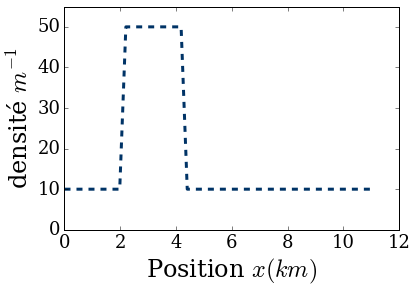

In [9]:
t_sim = 0      # le temps de la simulation en min
CL    = 10     # conditon limite en voiture/km
v_max = 80     # vitesse maximale en km/h
u=numpy.empty(3)

# On appel notre fonction evo
evo(CL,t_sim,v_max,v)

In [10]:
# On ressort alors le résultat recherché
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(u[0]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 0s : v = 17.78 m/s


---
2) Quelle est la vitesse moyenne au temps t = 180s en m/s (arrondir à 2 décimales).

---

Pour répondre à cette 2e question, il nous faut spécifier un temps de simulation (de 3 min pour cette première partie). Quant à la vitesse maximale et à la condition limite, celles-ci ne changeant pas et restant en mémoire, il est inutile de les redéfinir.  

→ Vitesse moyenne du trafic à l'instant t = 180s : v = 20.56 m/s


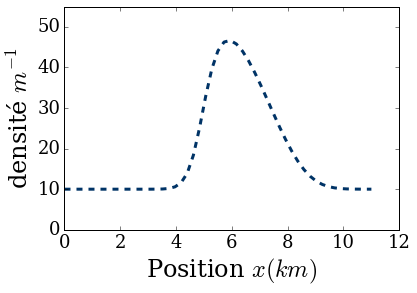

In [11]:
t_sim = 3   # En min

evo(CL,t_sim,v_max,v)
print ("→ Vitesse moyenne du trafic à l'instant t = 180s : v =",round(u[2]*10/36,2),"m/s")

En esquissant le graphe de la densité en fonction de la distance, nous observons que le signal carré de départ est devenu un signal plus courbé (comme vu dans les leçons) #discussion à suivre

---
3) Quelle est la vitesse minimale au temps t = 360s en m/s (arrondir à 2 décimales).

---

Pour cette dernière question de la première partie nous fixons le temps de la simulation à 6 min comme demandé et nous ne redéfinissons aucune autre variables pour les raisons évoquées à la question 2).

→ Vitesse minimale du trafic à l'instant t = 180s : v = 18.58 m/s


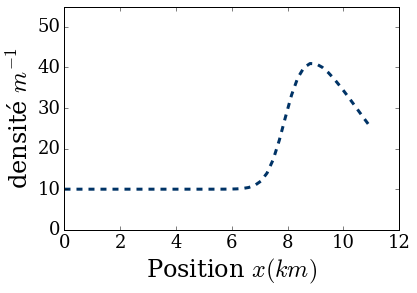

In [12]:
t_sim = 6    # En min

evo(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 180s : v =",round(u[1]*10/36,2),"m/s")

---

**Animation**

---

Pour bien se rendre compte de ce qui c'est passé dans les questions précédentes et afin de visualiser la situation, nous pouvons réaliser une animation de l'ensemble des graphes (correspondant chacun à un certain point de la grille de temps) généré à la question 3 (par exemple). Nous allons ainsi visualiser l'évolution de la densité en chaque position au cours du temps.


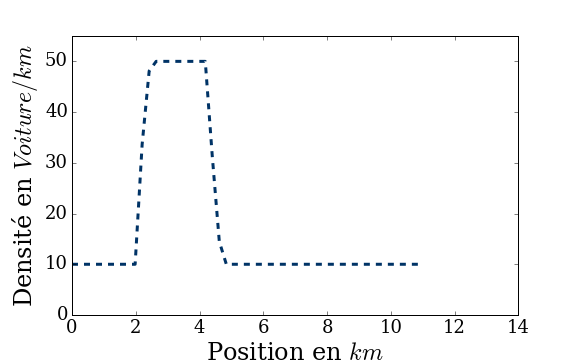
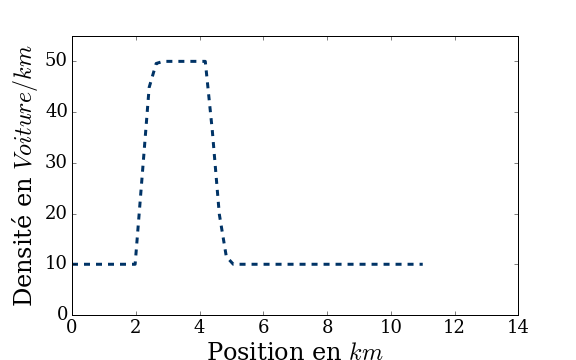
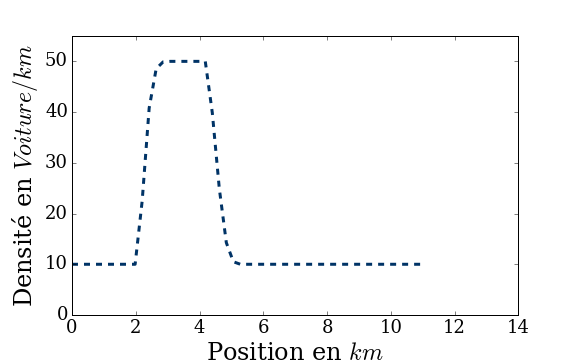
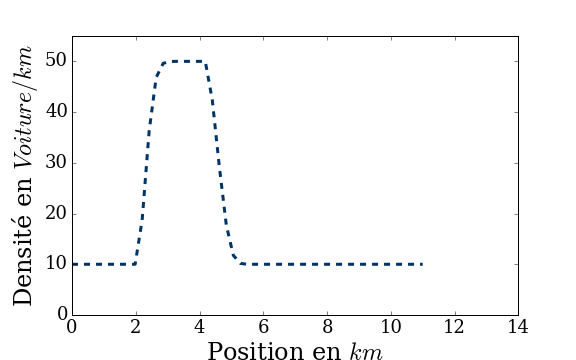
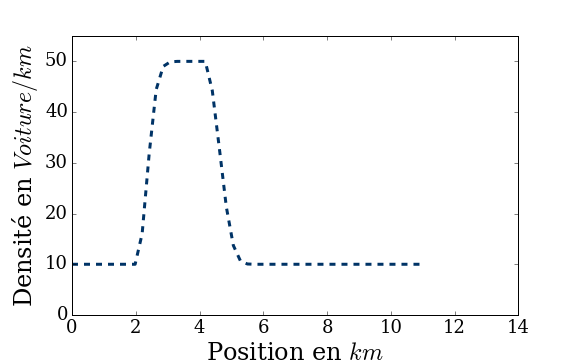
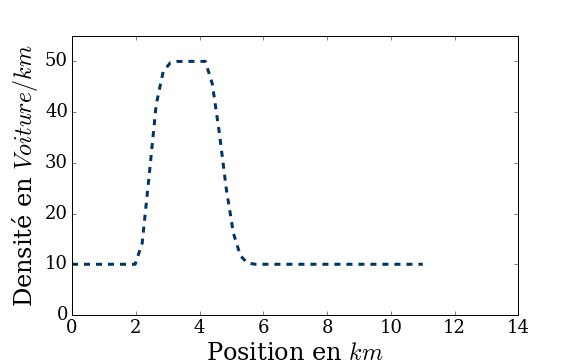
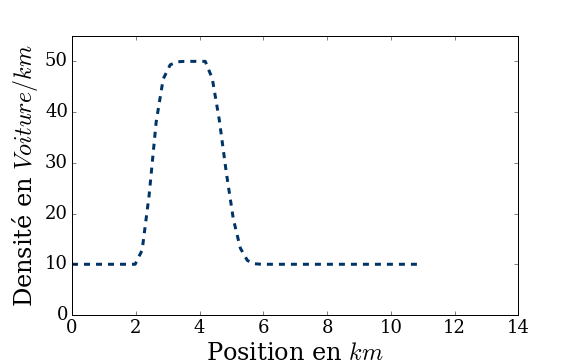
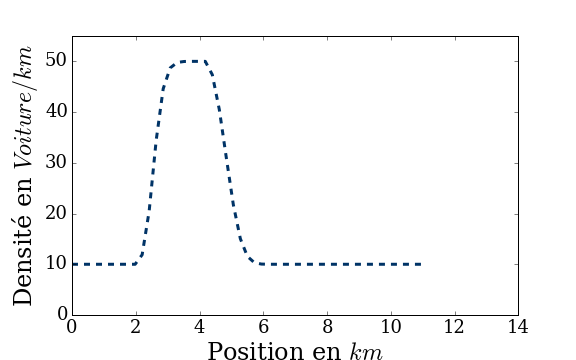
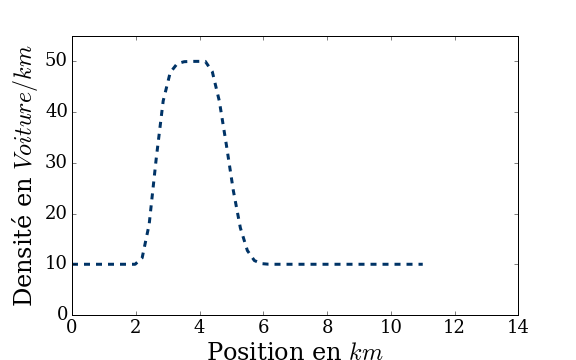
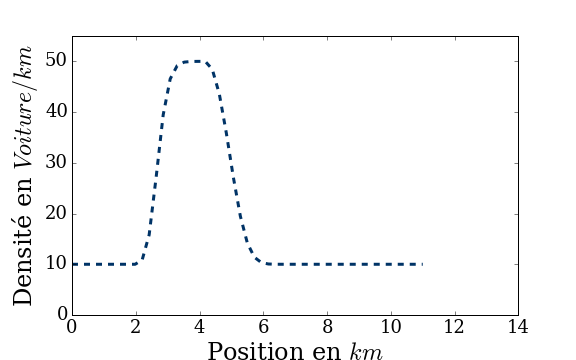
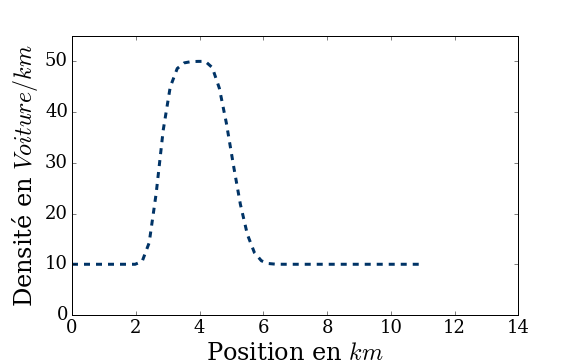
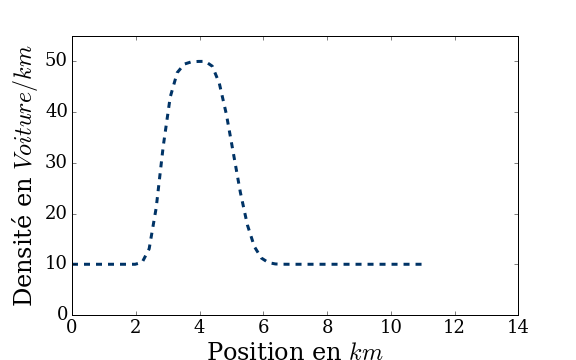
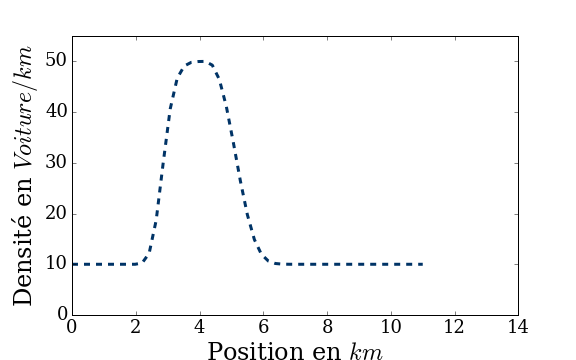
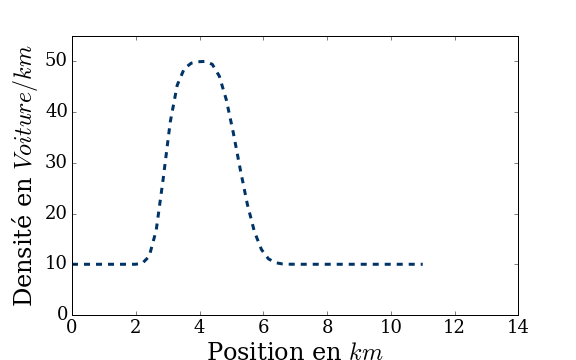
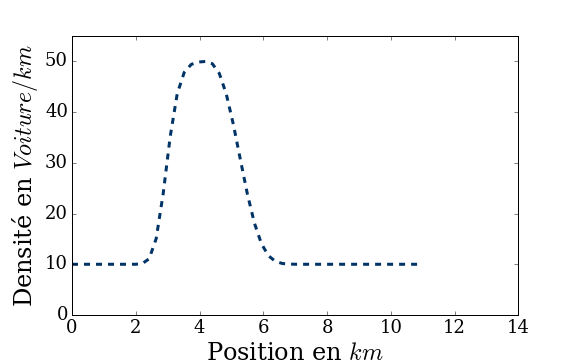
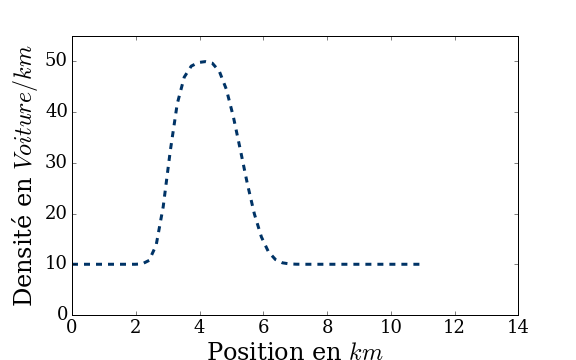
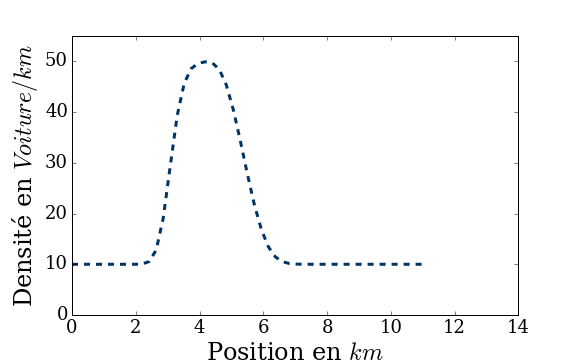
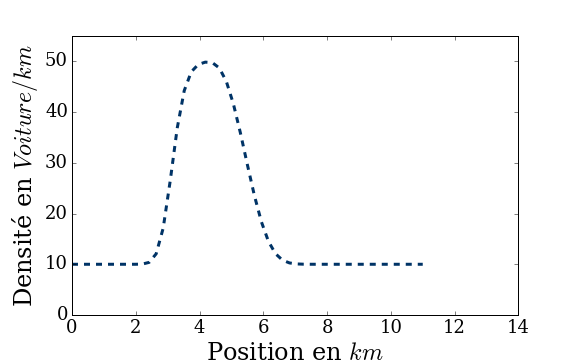
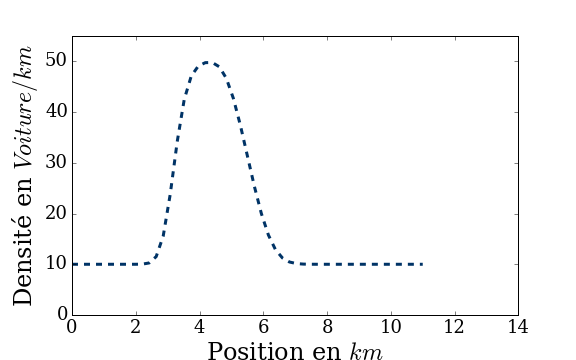
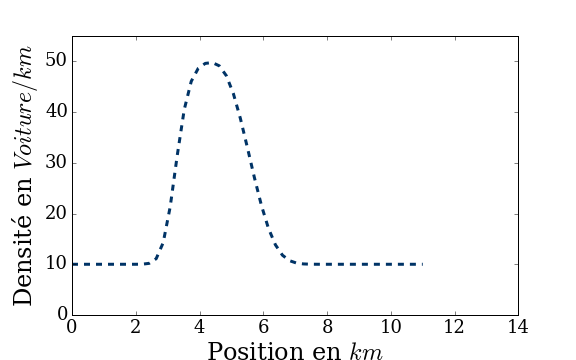
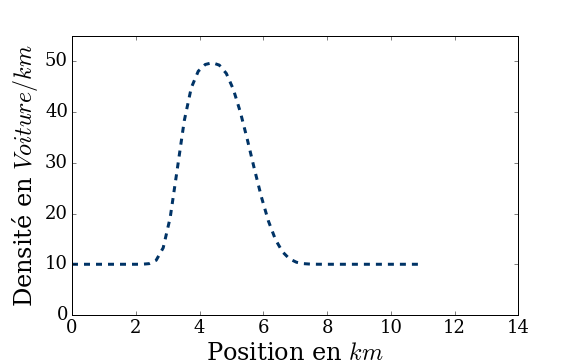
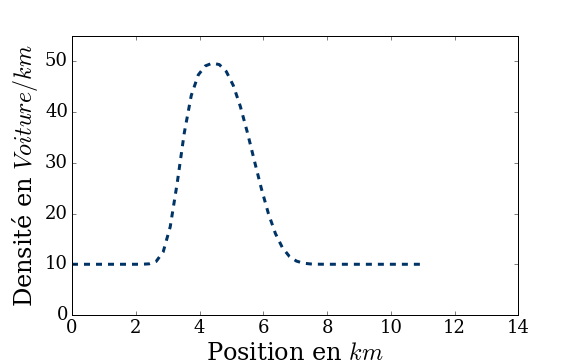
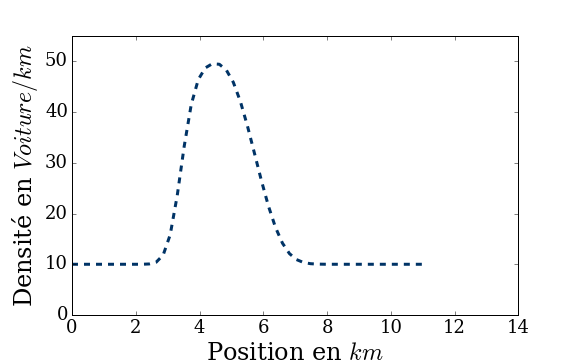
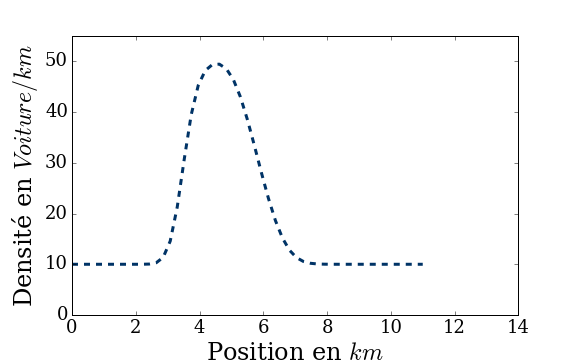
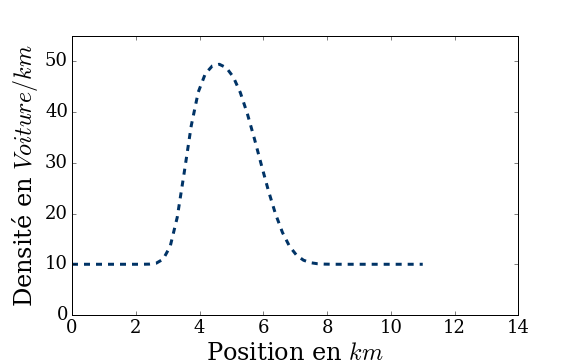
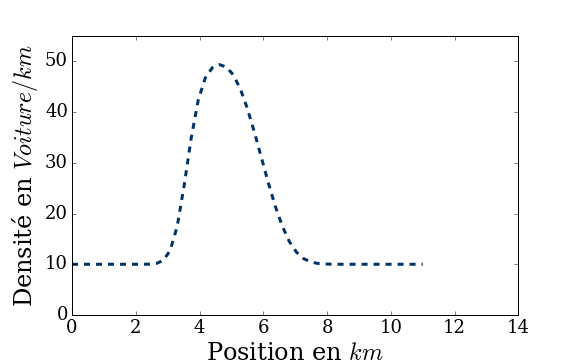
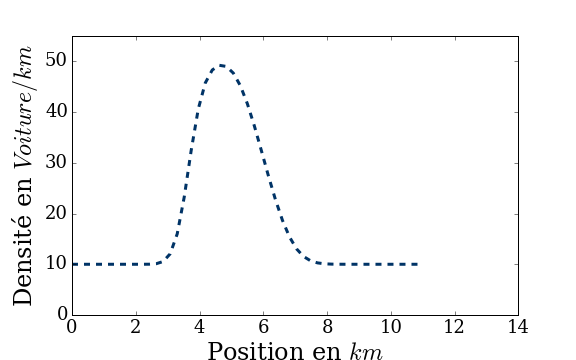
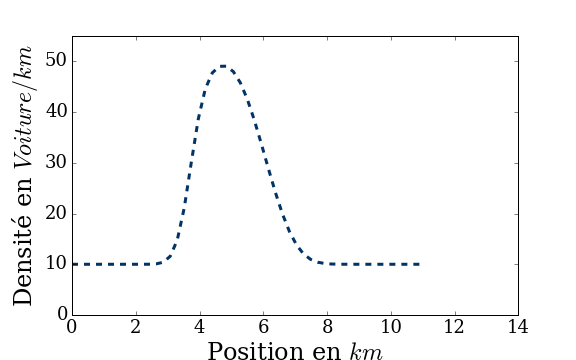
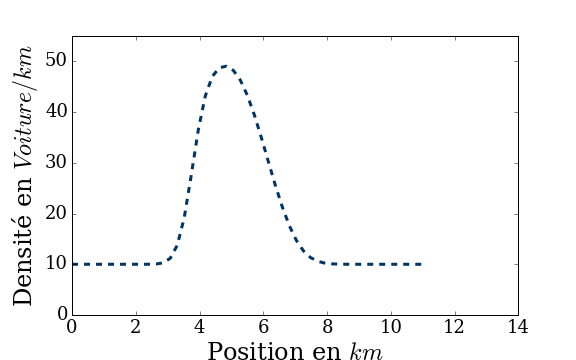
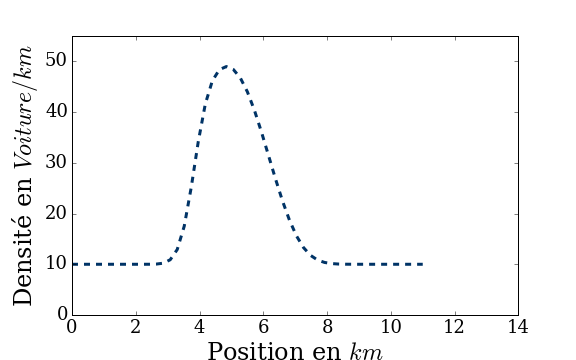
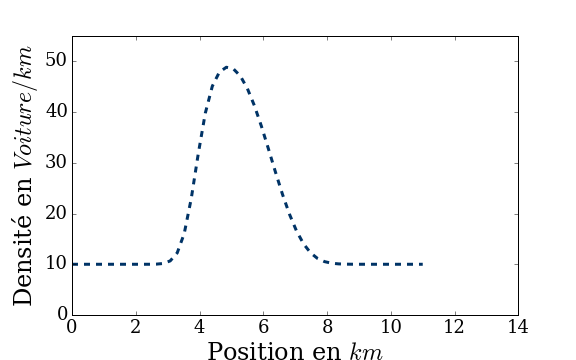
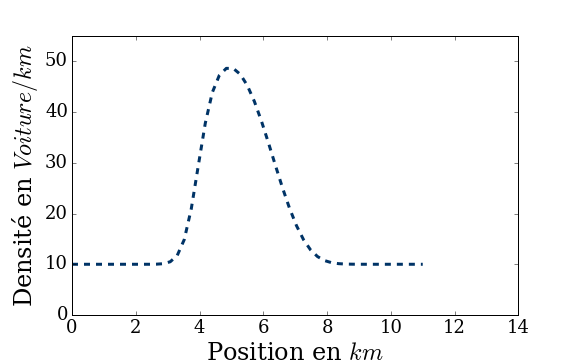
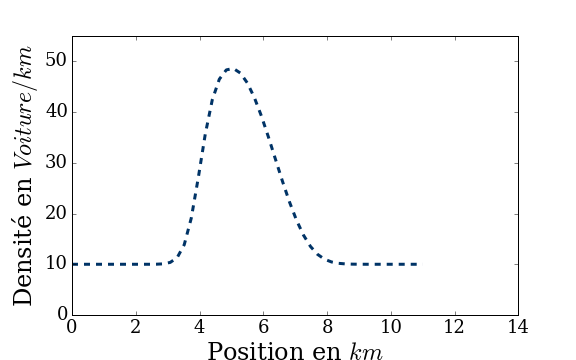
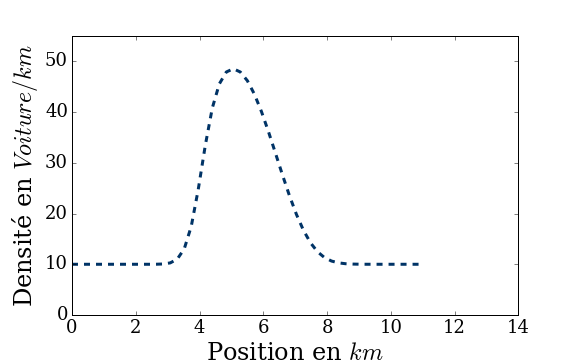
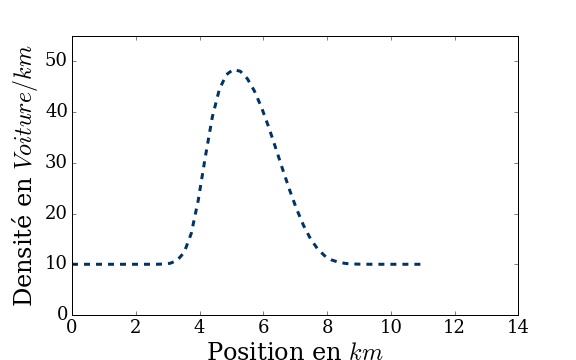
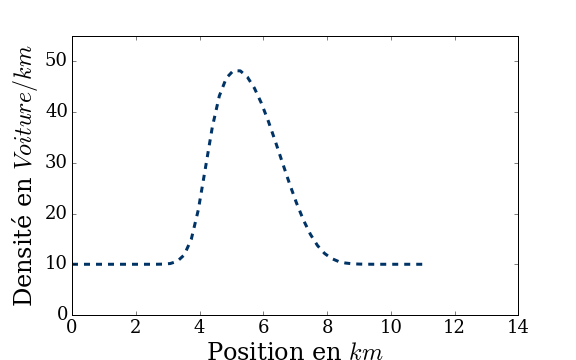
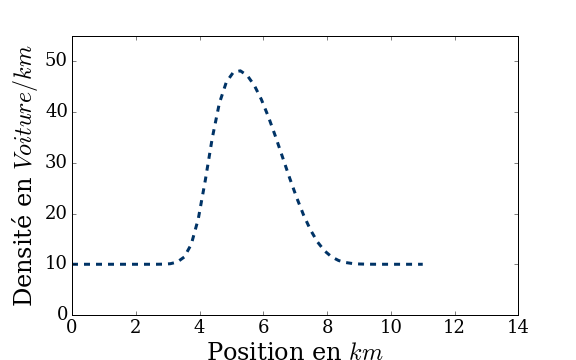
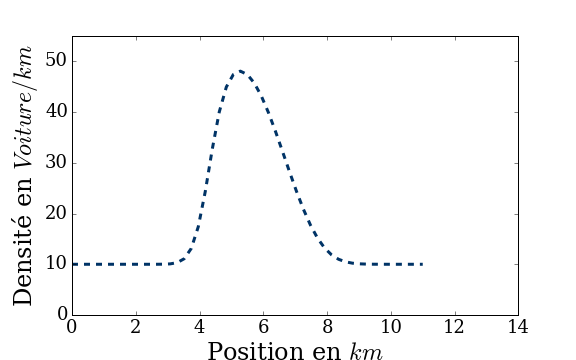
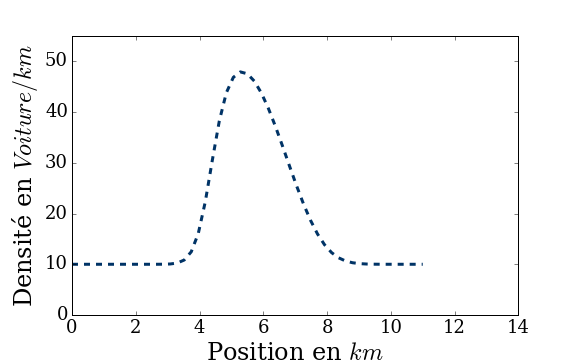
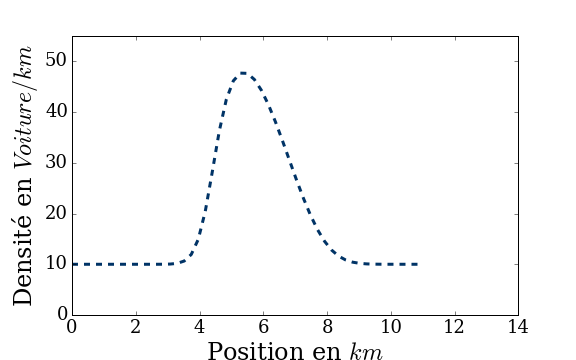
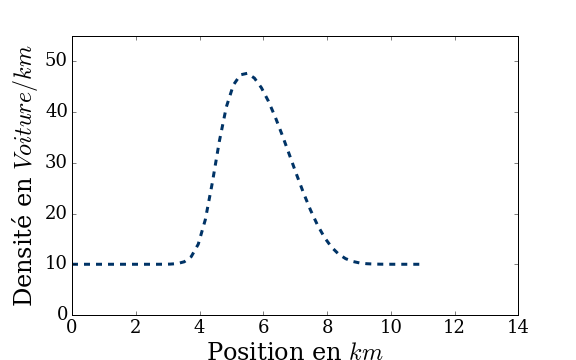
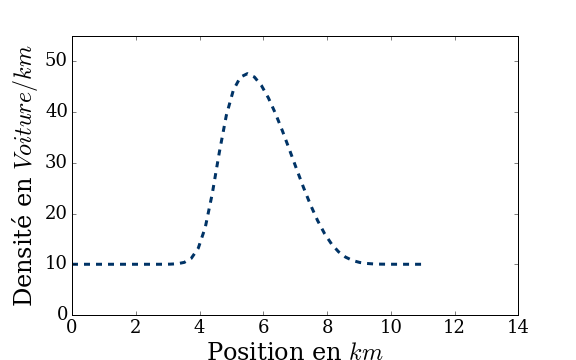
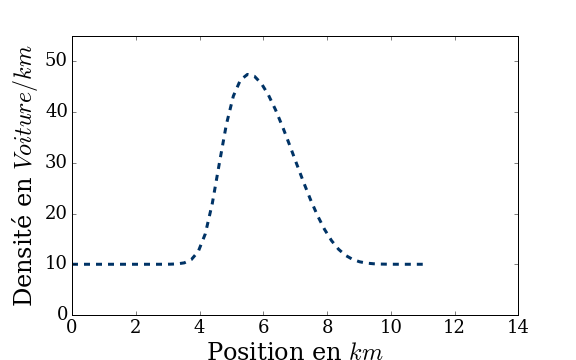
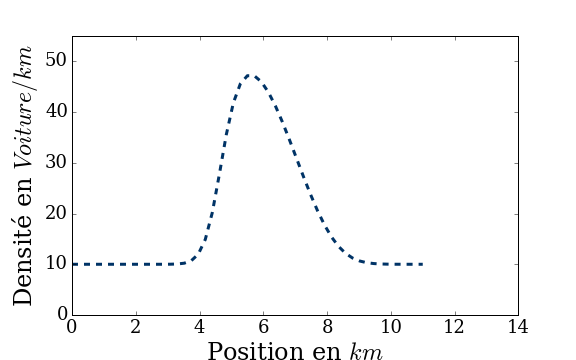
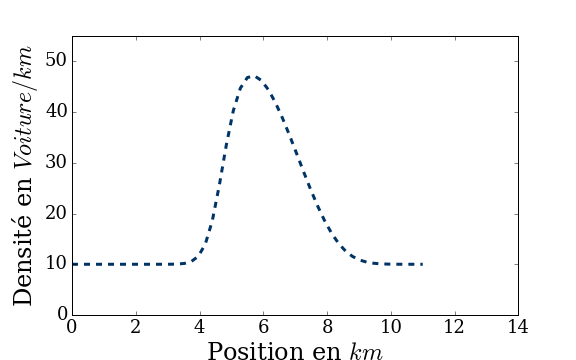
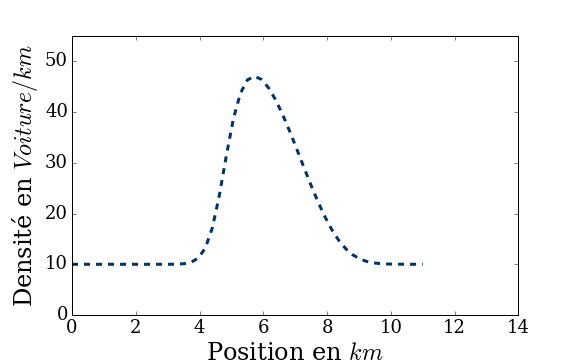
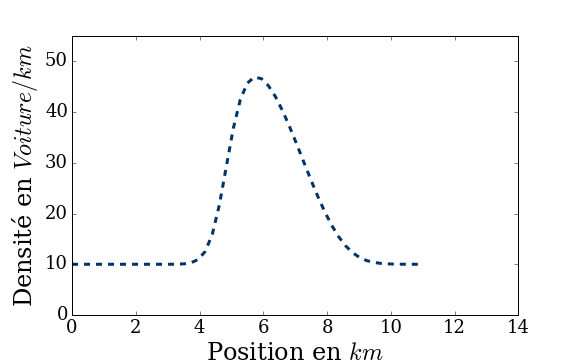
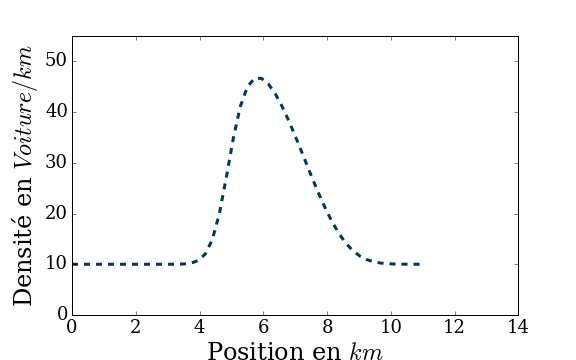
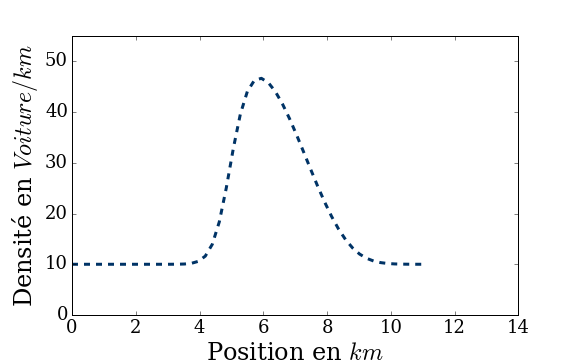
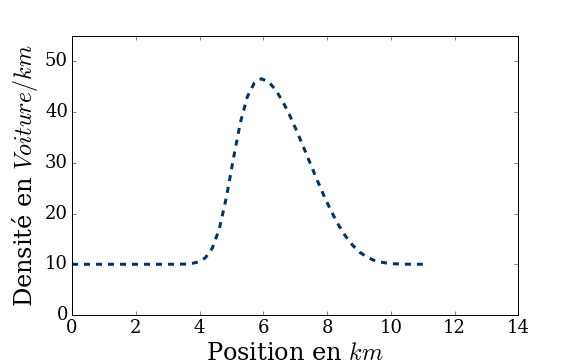
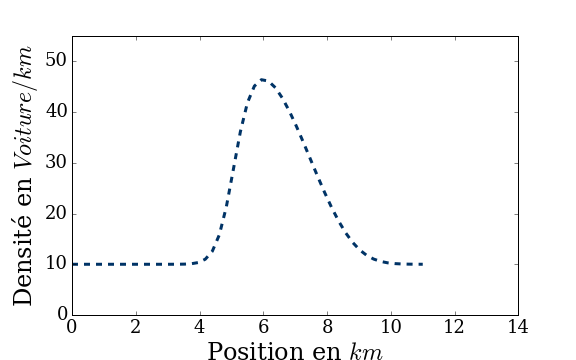
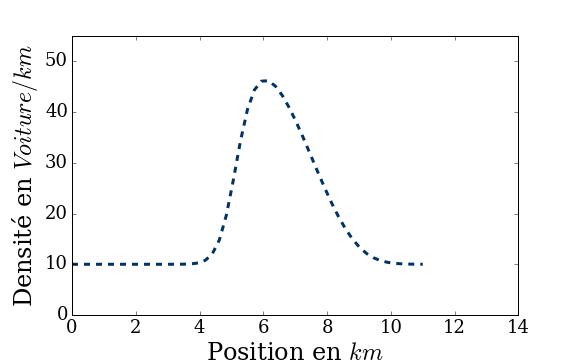
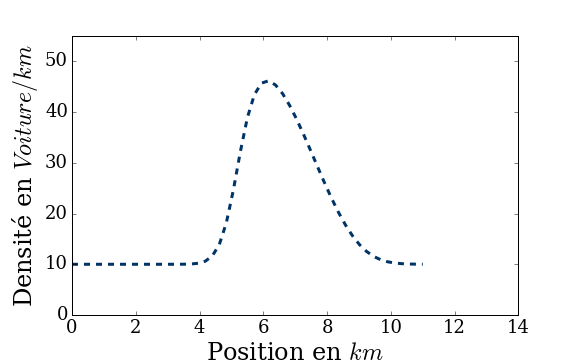
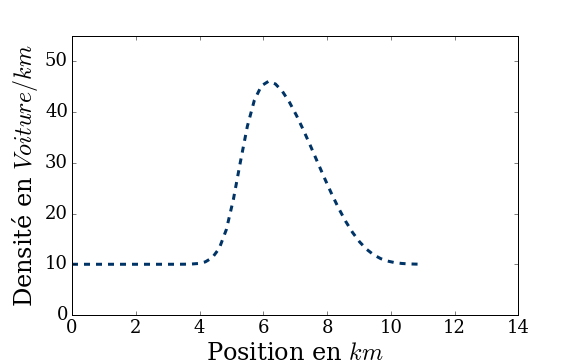
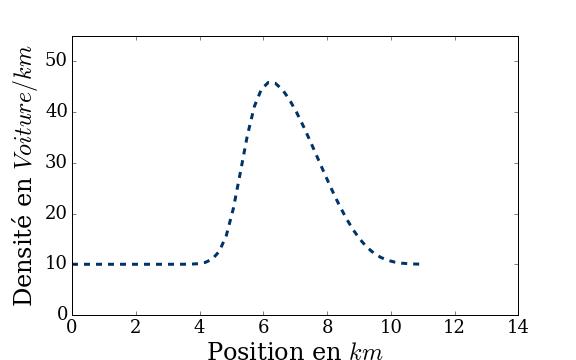
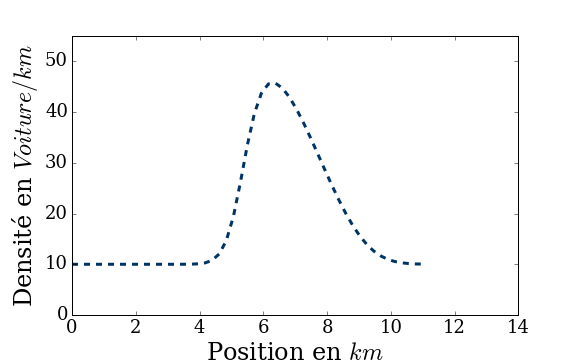
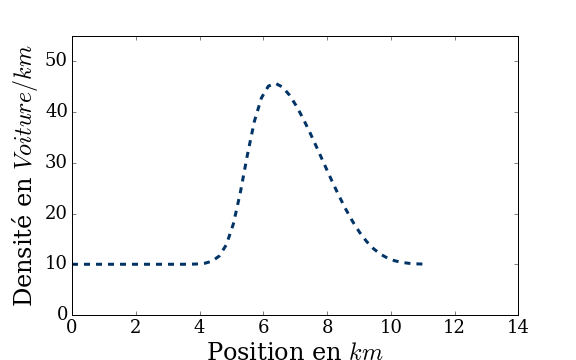
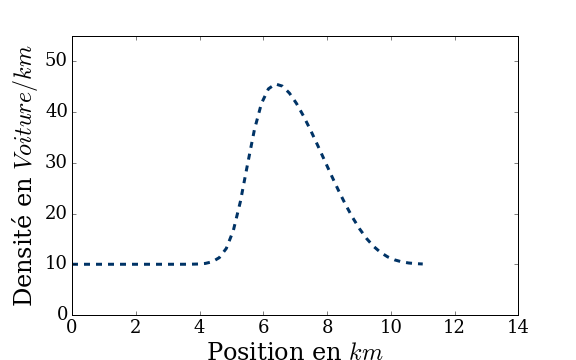
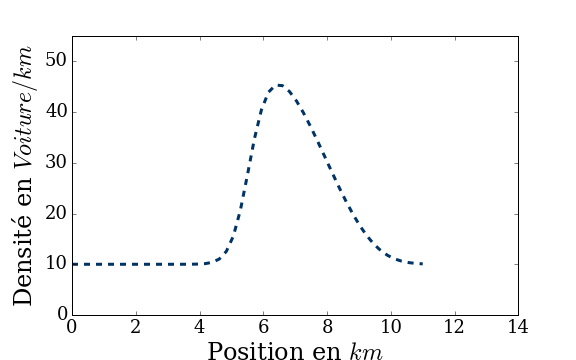
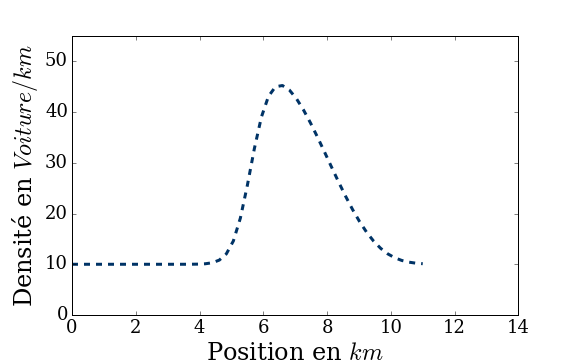
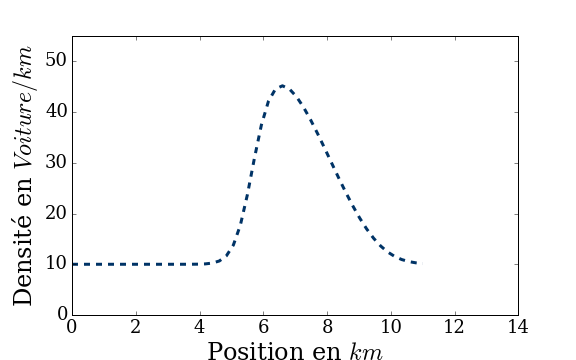
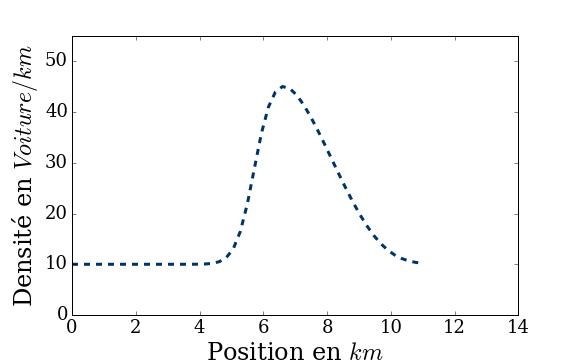
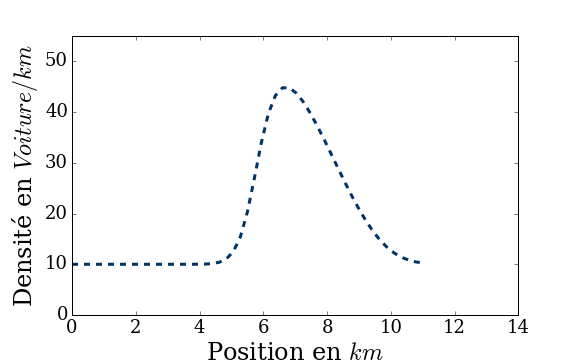
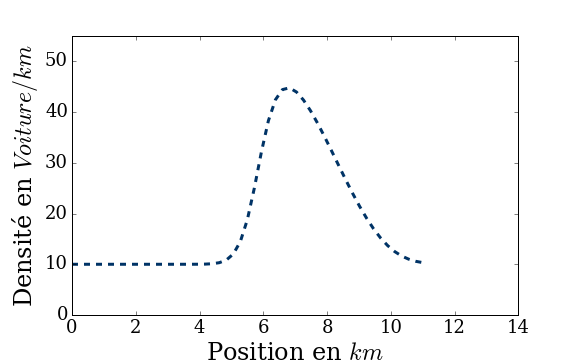
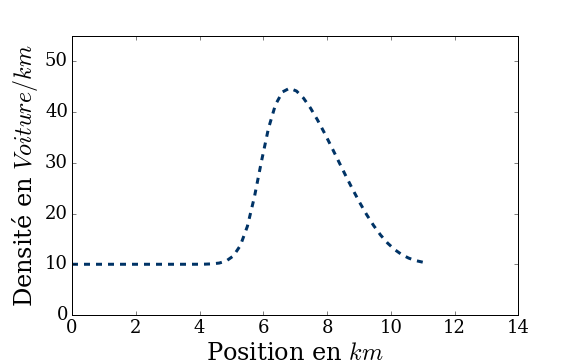
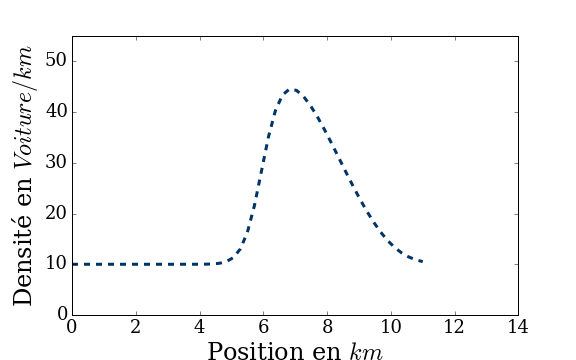
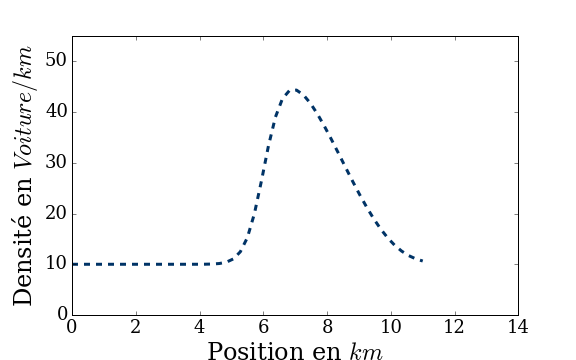
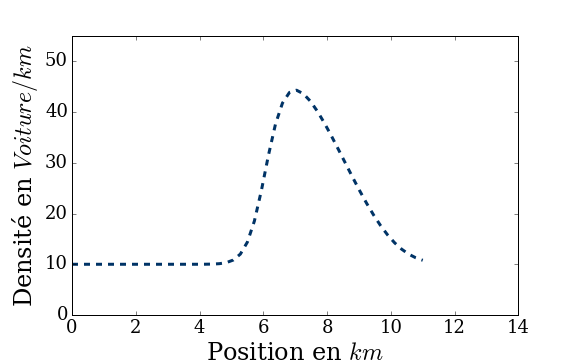
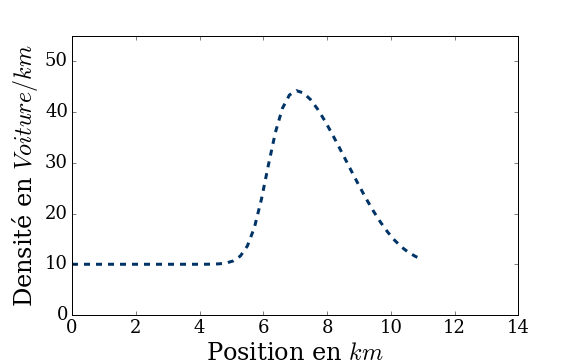
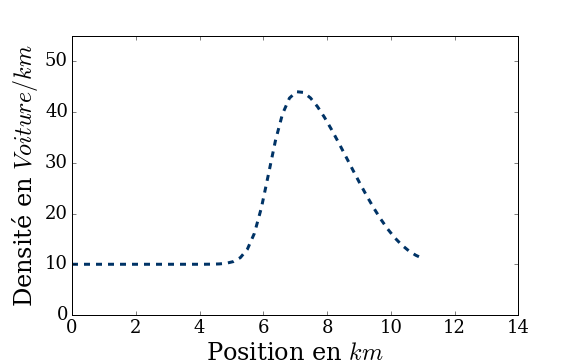
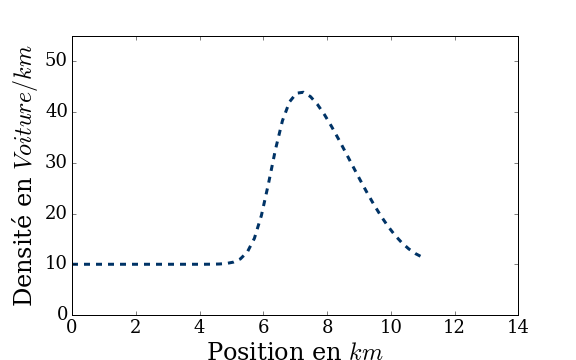
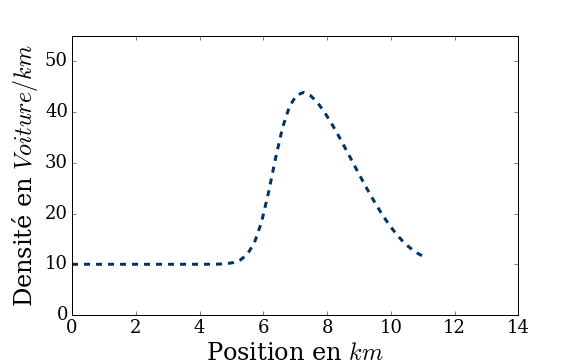
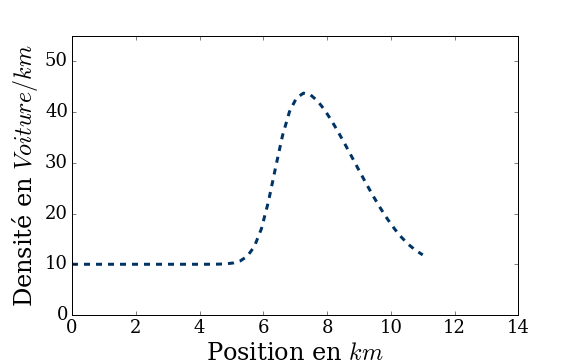
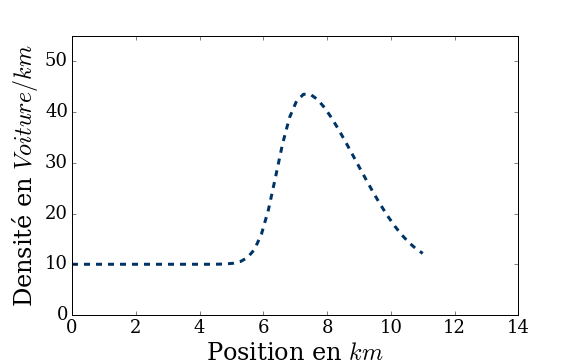
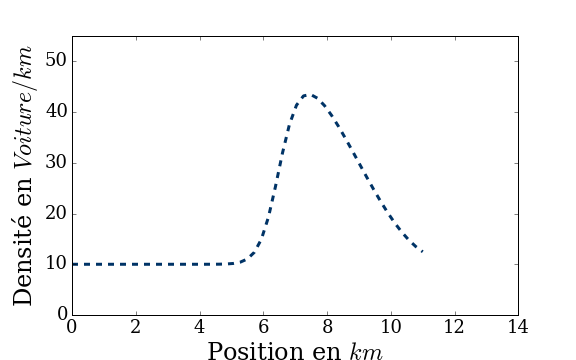
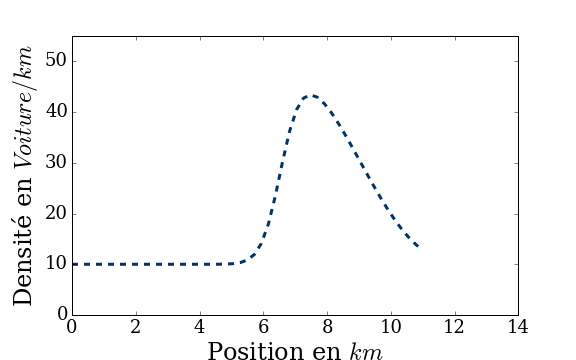
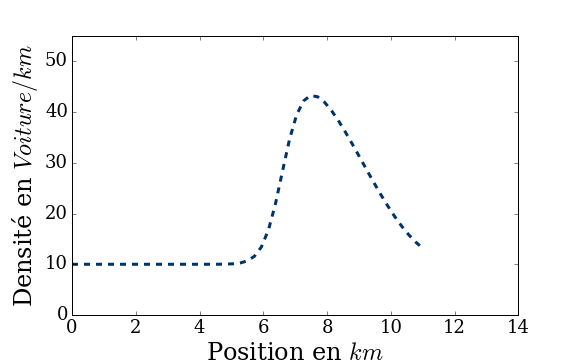
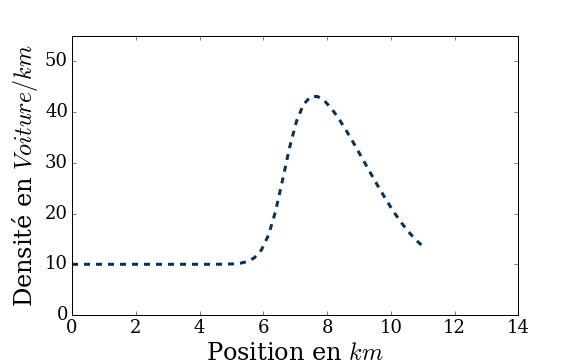
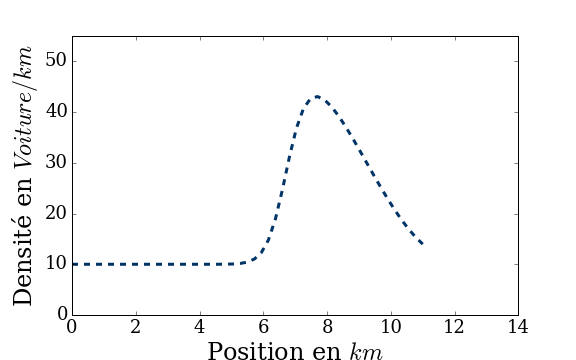
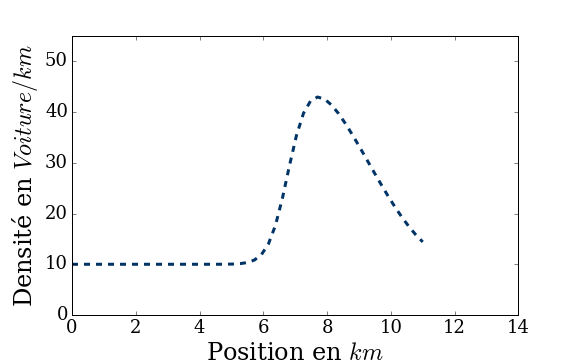
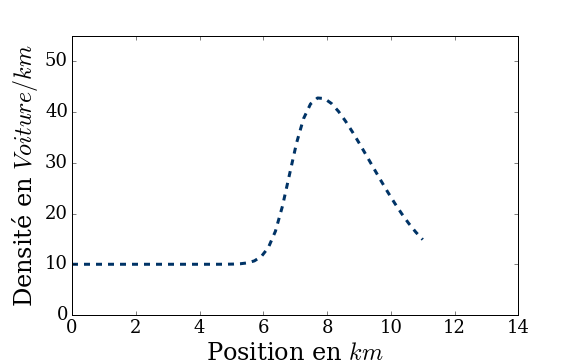
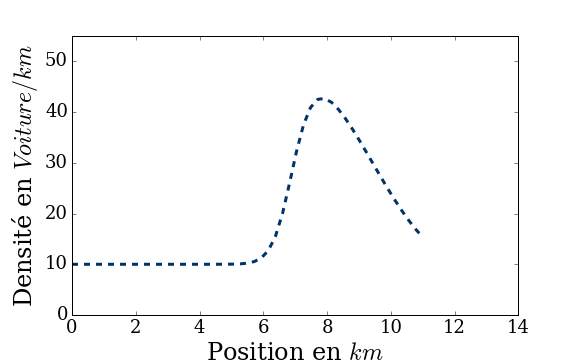
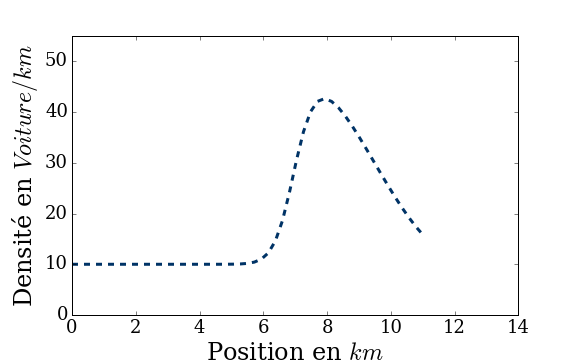
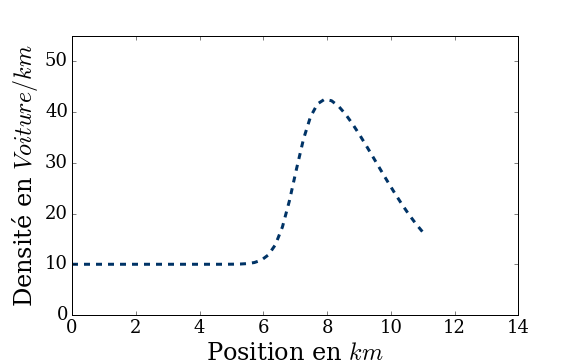
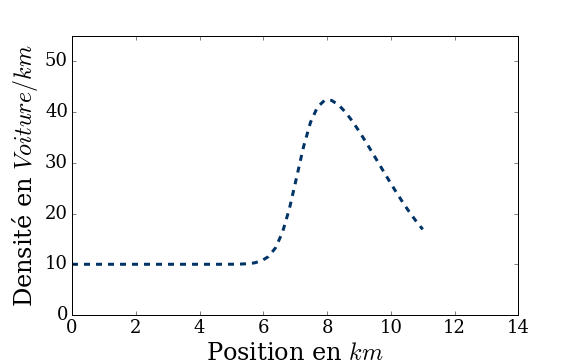
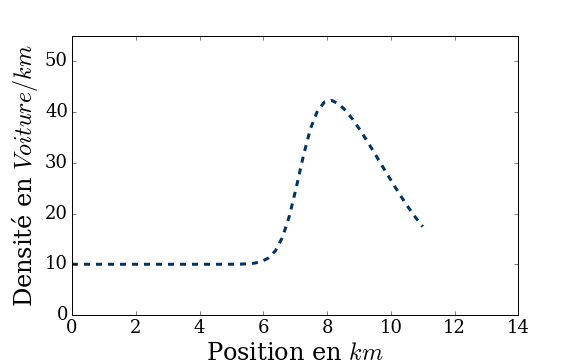
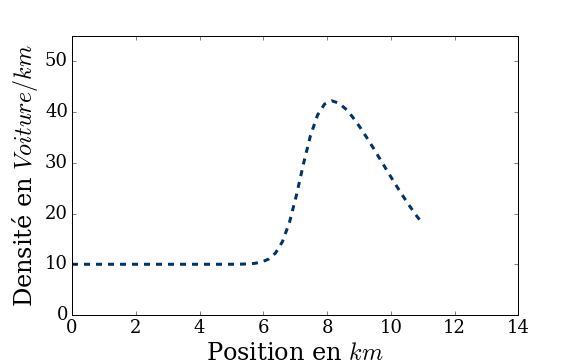
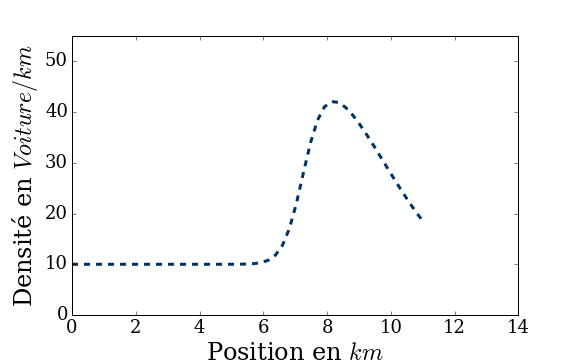
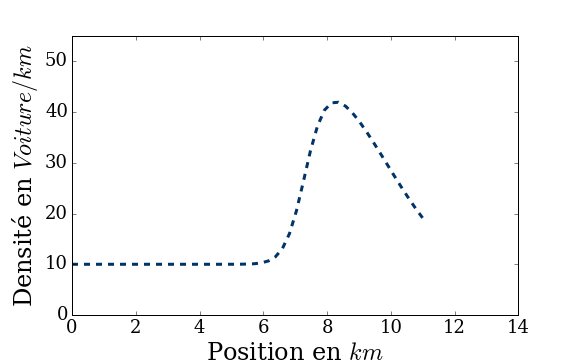
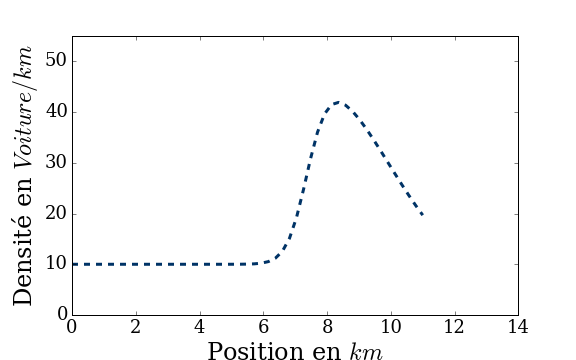
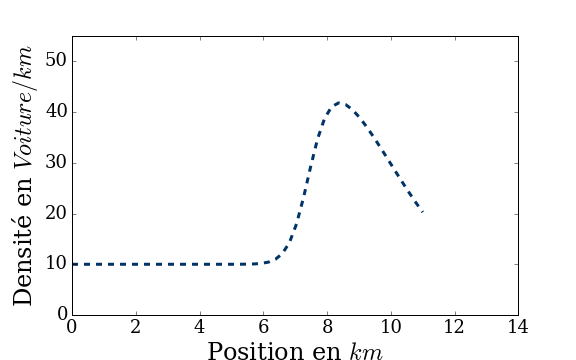
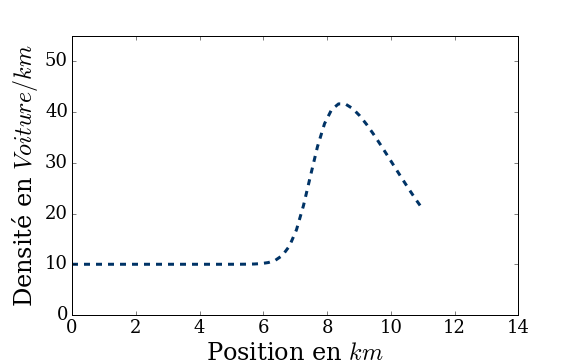
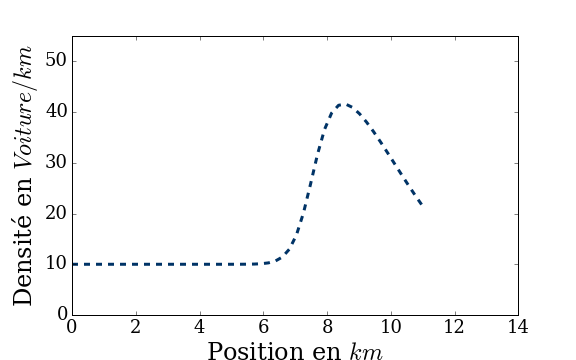
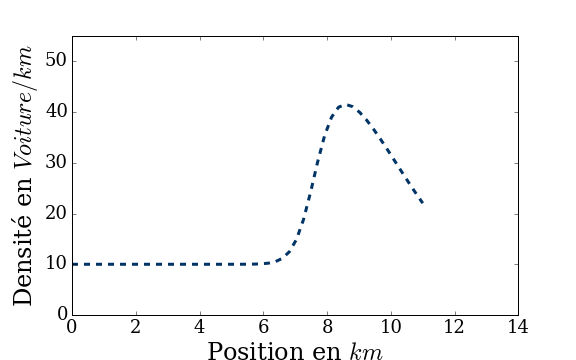
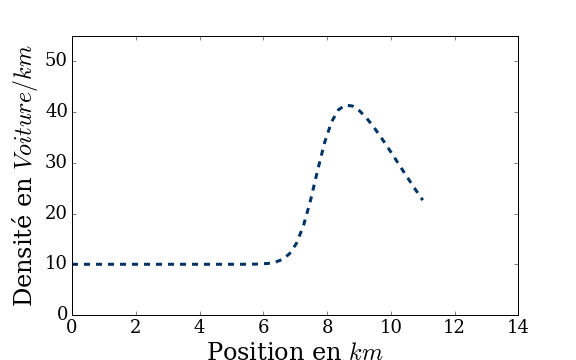
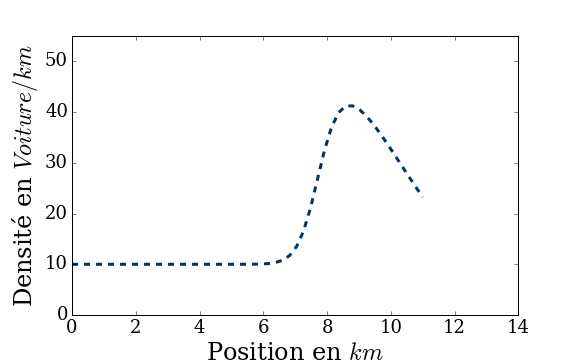
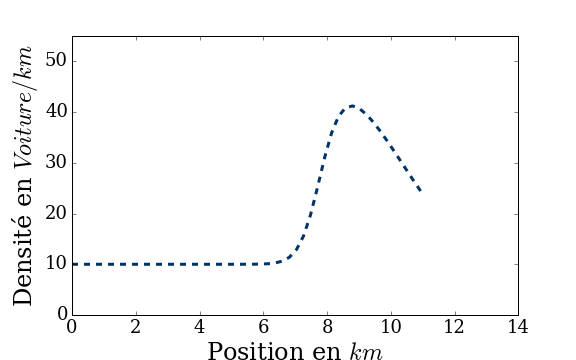
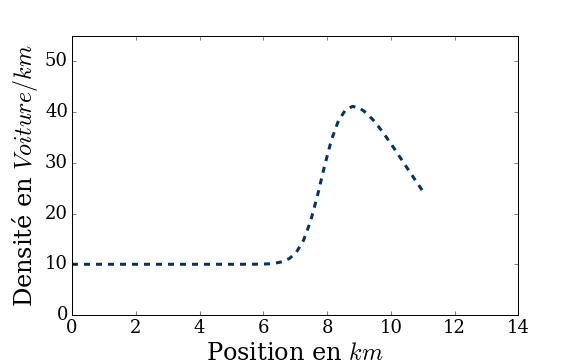
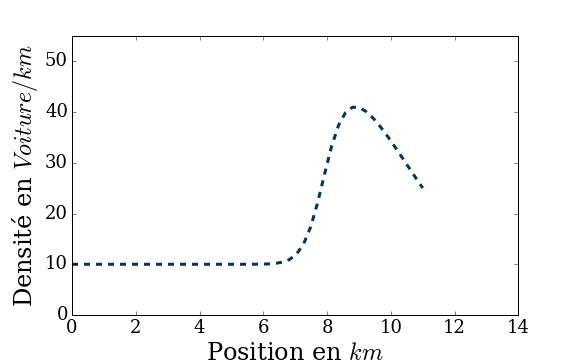
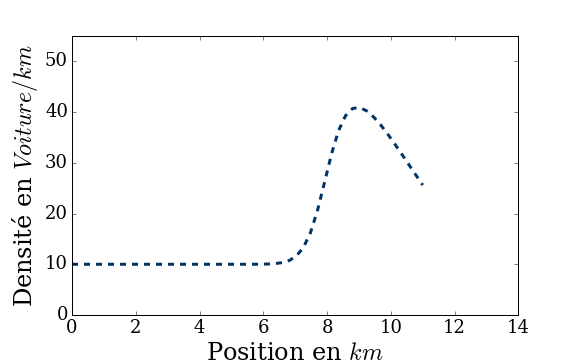
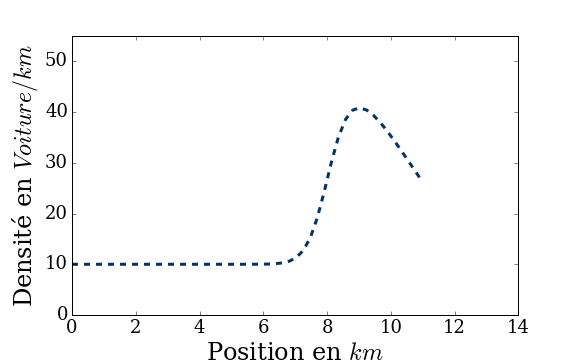

In [13]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,14), ylim=(0,55))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
pyplot.xlabel('Position en $km$',fontsize=24)
pyplot.ylabel('Densité en $Voiture/km$',fontsize=24)
pyplot.tick_params(axis='both',labelsize=18)


nt=int(t_sim/(dt*60))+1   # Nombre de point requis dans la grille pour la simulation

# On initialise notre liste des positions
x = numpy.linspace(0,L,nx)

# Nos conditions initiales
rho = numpy.ones(nx)*10
rho[10:20] = 50
rho[0] = 10       # Notre condition au bord
    
def trafic(i):
    line.set_data(x,rho)
    rhon   = rho.copy()    # Notre première matrice densité est celle correspondant à nos conditions initiales.
    rho[1:]= rhon[1:]- dt/dx* v_max *(1-2*rhon[1:]/rho_max)*(rhon[1:]-rhon[0:-1])

animation.FuncAnimation(fig, trafic,frames=nt, interval=100)

---

#### PARTIE B.
---

Pour cette seconde partie nous allons procéder de manière identique à la première en veillant à procéder aux bons changement de paramètres et variables.

Nous commençons donc par déclarer nos nouvelles variable et conditions initiales & limites.

In [14]:
# Déclaration des variables

v_max = 136     # en km/h
L     = 11      # en km
rho_max = 250   # en voitures/km
nx    = 51      # Nombre de point de la grille des positions
CL    = 20      # Nouvelle condition limite
v_max = 136     # Nouvelle vitesse maximale

# Nouvelle condition initiale
x = numpy.linspace(0,L,nx)
rho0B = numpy.ones(nx)*20 
rho0B[10:20] = 50

On vérifie grâce à un nouveau graphique de la densité que nos nouvelles conditions ont correctements été initialisées.

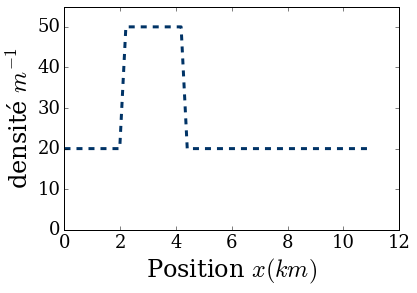

In [15]:
pyplot.ylabel('densité'' ''$m^{-1}$', fontsize=24) # nom de l'axe x & taille de la police
pyplot.xlabel('Position'' ''$x(km)$', fontsize=24) # nom de l'axe y & taille de la police
pyplot.plot(x, rho0B, color='#003366', ls='--', lw=3)
pyplot.tick_params(axis='both',labelsize=18)
pyplot.ylim(0,55);

Comme attendus, la densité de voiture au temps $t = 0s$ est bien fixé à :

$$
→ \left\{ 
\begin{aligned} 
& \mbox{50  voitures/km si nx} \in \mbox{ [ } 2.2,4.4 ]km \\
& \mbox{20 voitures/km partout ailleurs}
\end{aligned}
\right.
$$


Nos nouvelles conditions intiales étant fixées, nous pouvons commencer à répondre aux questions suivantes.

---
4) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

On se sert comme annoncer de notre fonction $evo()$ comme précédemment et on définit un temps de simulation de $t = 0s$. Aucune autre variable ne doit-être définie étant donné qu'elles l'ont été durant la partie qui précède cette question.

→ Vitesse minimale du trafic à l'instant t = 0s : v = 30.22 m/s


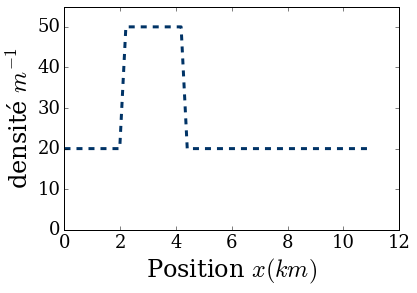

In [16]:
t_sim = 0    # En min

evo(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(u[0]*10/36,2),"m/s")

---
5) Quelle est la vitesse moyenne au temps t = 180s en m/s (arrondir à 2 décimales).

---

On change le temps de simulation et on rappel la fonction $evo()$.

→ Vitesse minimale du trafic à l'instant t = 180s : v = 33.77 m/s


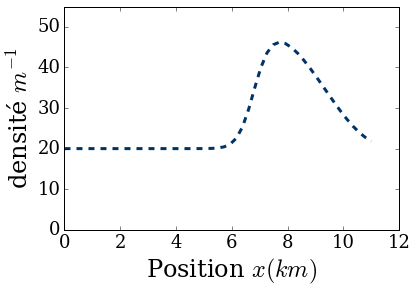

In [17]:
t_sim = 3    # En min

evo(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 180s : v =",round(u[2]*10/36,2),"m/s")

---
6) Quelle est la vitesse minimale au temps t = 180s en m/s (arrondir à 2 décimales).

---

Pour cette dernière question, aucune des variables ne change. Il suffit dès lors de sortir la valeur déjà calculé par notre fonction lors de son dernier appel à la question 5).

In [18]:
print ("→ Vitesse minimale du trafic à l'instant t = 180s : v =",round(u[1]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 180s : v = 30.79 m/s


---
##### 3. Résolution du problème suivant la discrétisation de l'équation (3).

---

Pour cette deuxième approche du problème utilisant une discrétisation différente de la première nous allons comme annoncé en début de ce notebook utilisé la discrétisation de l'équation (3).

Ceci implique une petite modification dans notre fonction $evo()$ à savoir la ligne de code dans la boucle for qui rend compte de notre discrétisation. En respectant ainsi la discrétisation nous avons alors la nouvelle fonction $evo2()$ suivante :

In [19]:
def evo2(CL,t_sim,v_max,v):

    """
    
    
    
    """
    # On pose l'ensemble des paramètres qui reste fixes d'une simulation à une autre
    dt=0.001 
    nt=int(t_sim/(dt*60))+1   # Nombre de point requis dans la grille pour la simulation
    L=11                      # en km
    rho_max=250               # en voitures/km
    nx=51                     # Nombre de point de la grille d'espace
    dx=L/(nx-1)

    #On pose nos conditions intiales 
    x = numpy.linspace(0,L,nx)
    rho0A = numpy.ones(nx)*CL
    rho0A[10:20] = 50
    
    # Définition de notre matrice densité pour tout temps et toute position
    
    rho=numpy.empty((nt,nx))
    rho[0]=rho0A         

    #On calcul notre densité inconnue pour tout temps
    for n in range(0, nt-1):  
        rho[n+1][1:] = rho[n][1:]-((dt/dx)*v_max*((rho[n][1:]*(1-(rho[n][1:]/rho_max)))-(rho[n][0:-1]*(1 - (rho[n][0:-1]/rho_max)))))
        rho[n+1][0]=CL   # Notre condition au bord

    #Réalise un graphe des densités finales en fonction de la position
    pyplot.ylabel('densité'' ''$m^{-1}$', fontsize=24) # nom de l'axe x & taille de la police
    pyplot.xlabel('Position'' ''$x(km)$', fontsize=24) # nom de l'axe y & taille de la police
    pyplot.plot(x, rho[nt-1], color='#003366', ls='--', lw=3)
    pyplot.tick_params(axis='both',labelsize=18)
    pyplot.ylim(0,55);
    
    #Calcul des valeurs recherché et stockage de celles-ci    
    vmoyF = v(numpy.mean(rho[nt-1]))
    vminI = min(v(rho[0,:]))
    vminF = min(v(rho[nt-1,:]))
    
    
    w[0]=vminI
    w[1]=vminF
    w[2]=vmoyF

Ensuite, afin de ne pas surcharger ce notebook et d'éviter de laçer le lecteur, nous nous permettons ici de donner les résultats d'une même partie les uns à la suite des autres, les justifications et l'emplois de chaque algorithme étant identique a ce qui à été fait dans la partie consacré à la première discrétisation.

#### PARTIE A .
---

→ Déclaration des nouvelles variables.

In [20]:
# Déclaration des variables

v_max = 80       # en km/h
CL    = 10       # Condition limite en voiture/km

# Déclaration d'un tableau qui va contenir les vitesses 
w=numpy.empty(3)

---
1) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

→ Vitesse minimale du trafic à l'instant t = 0s : v = 17.78 m/s


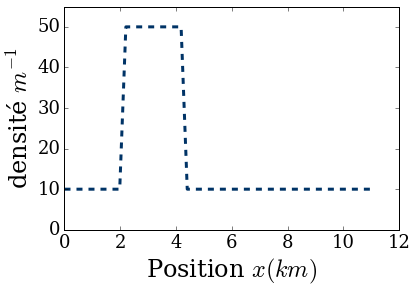

In [21]:
t_sim = 0    # En min

evo2(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(w[0]*10/36,2),"m/s")

---
2) Quelle est la vitesse moyenne au temps t = 180s en m/s (arrondir à 2 décimales).

---

→ Vitesse moyenne du trafic à l'instant t = 180s : v = 20.64 m/s


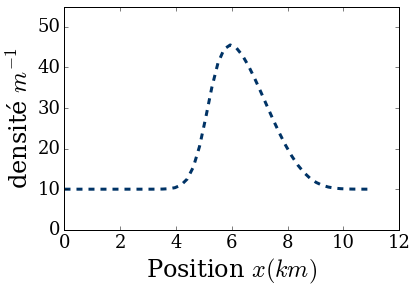

In [22]:
t_sim = 3    # En min

evo2(CL,t_sim,v_max,v)
print ("→ Vitesse moyenne du trafic à l'instant t = 180s : v =",round(w[2]*10/36,2),"m/s")

---
3) Quelle est la vitesse minimale au temps t = 360s en m/s (arrondir à 2 décimales).

---

→ Vitesse minimale du trafic à l'instant t = 360s : v = 18.78 m/s


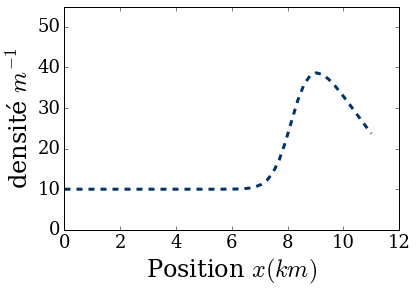

In [23]:
t_sim = 6    # En min

evo2(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 360s : v =",round(w[1]*10/36,2),"m/s")

---

#### Partie B
---

Les conditions pour cette ultime partie sont données par:

In [24]:
# Déclaration des variables
v_max = 136       # en km/h
CL    = 20        # Condition limite en voiture/km

---
4) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

→ Vitesse minimale du trafic à l'instant t = 0s : v = 30.22 m/s


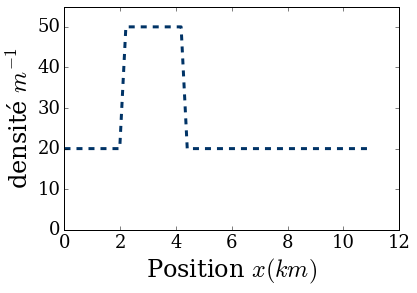

In [25]:
t_sim = 0    # En min

evo2(CL,t_sim,v_max,v)
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(w[0]*10/36,2),"m/s")

---
5) Quelle est la vitesse moyenne au temps t = 180s en m/s (arrondir à 2 décimales).

---

→ Vitesse moyenne du trafic à l'instant t = 180s : v = 33.87 m/s


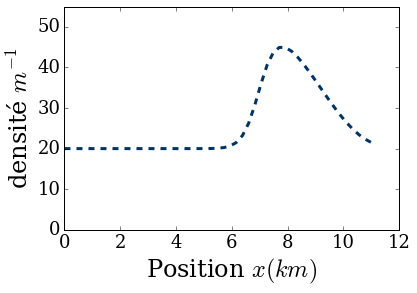

In [26]:
t_sim = 3    # En min

evo2(CL,t_sim,v_max,v)
print ("→ Vitesse moyenne du trafic à l'instant t = 180s : v =",round(w[2]*10/36,2),"m/s")

---
6) Quelle est la vitesse minimale au temps t = 180s en m/s (arrondir à 2 décimales).

---

In [27]:
print ("→ Vitesse minimale du trafic à l'instant t = 180s : v =",round(w[1]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 180s : v = 30.99 m/s


---

##### 4. Animations :

---

Pour bien se rendre compte de ce qui c'est passé dans les questions précédentes et afin de bien visualiser la situation, nous pouvons réaliser une animation de l'ensemble des graphes (correspondant chacun à un certain point de la grille de temps) généré pour un temps et une discrétisation donnée. Ceci nous permettra de visualiser l'évolution de la densité en chaque position au cours du temps.

Pour ce faire nous choisissons de créer deux animations pour la discrétisation de l'équation : $\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0 $. Une première pour la partie A et une seconde pour la partie B.

Créons maintenant les animations désirée.

---

#### Simulation Partie A - discrétisation de l'équation (3).
---

Commençons par redéfinir certaine de nos variables.

Remarque : Le choix du temps de simulation est arbitraire.

In [28]:
# Déclaration des variables

v_max = 80       # En km/h
CL    = 10       # Condition limite en voiture/km
t_sim = 3        # En min

# Déclaration d'un tableau qui va contenir les vitesses 
w=numpy.empty(3)


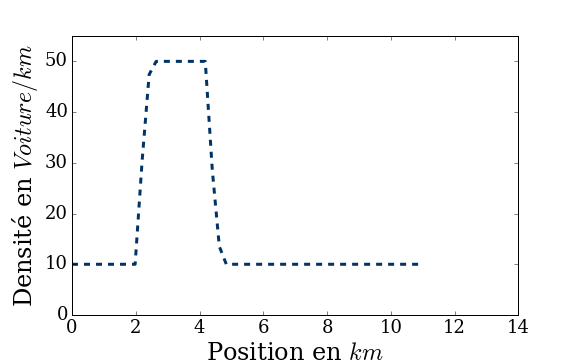
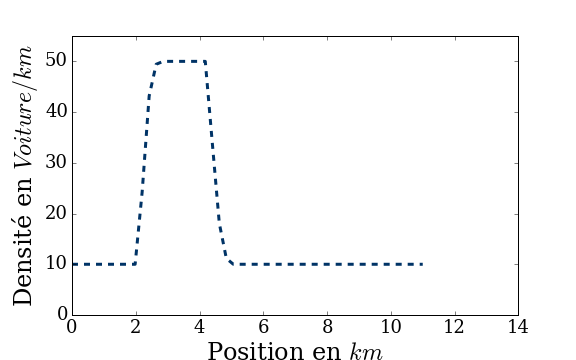
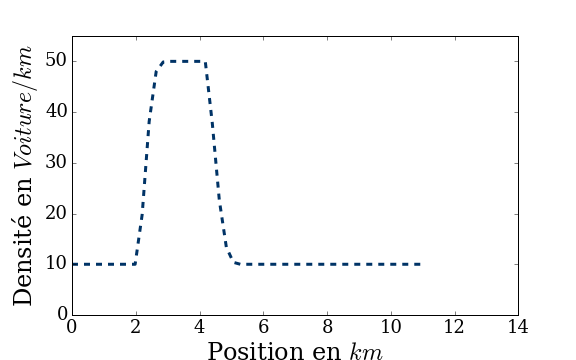
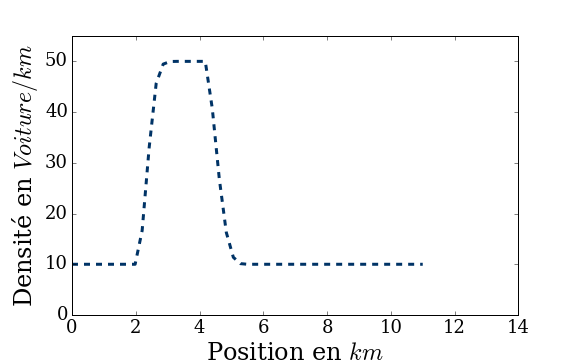
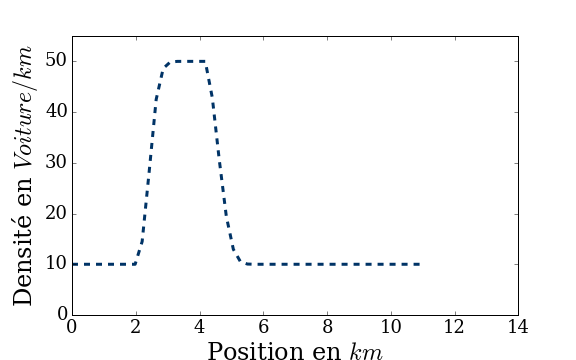
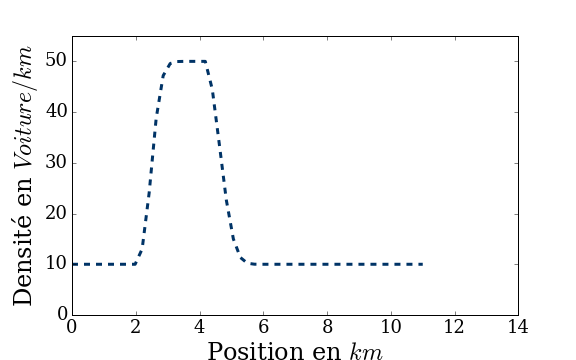
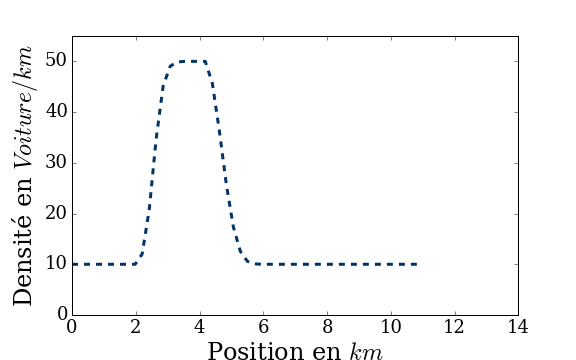
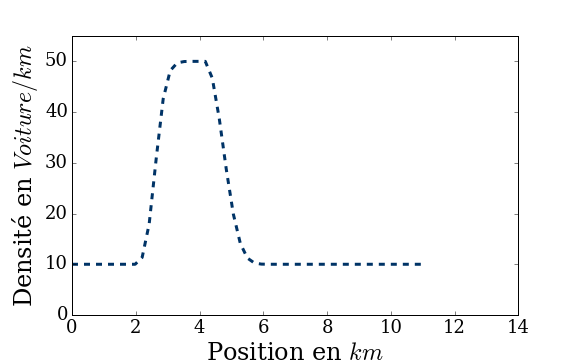
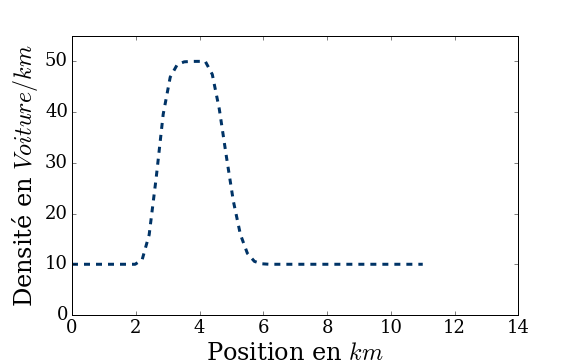
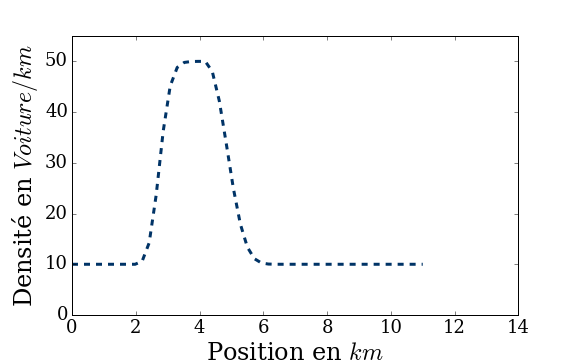
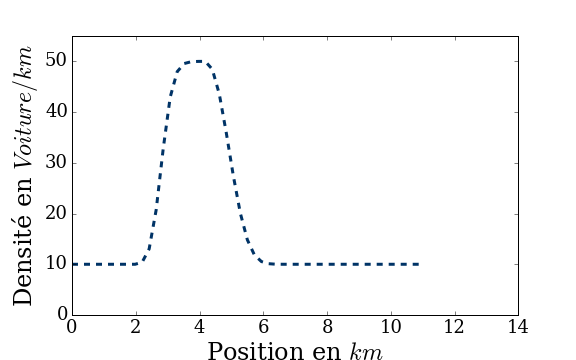
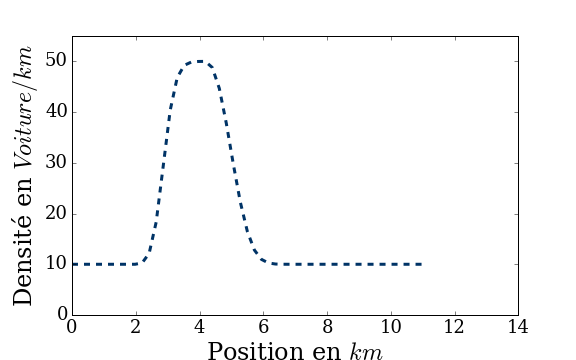
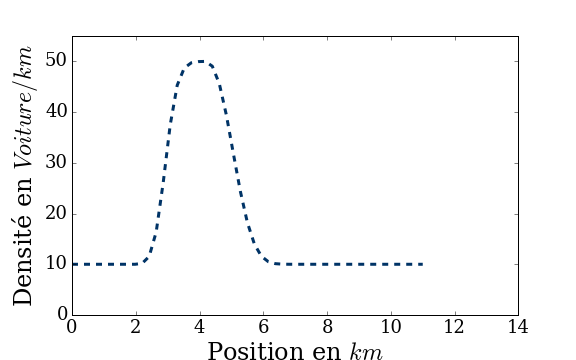
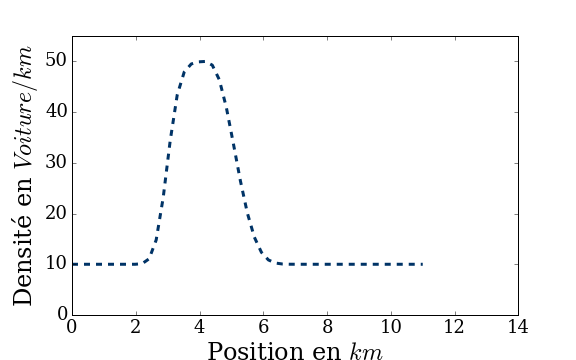
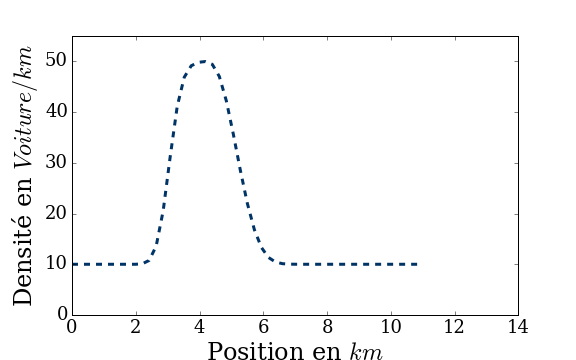
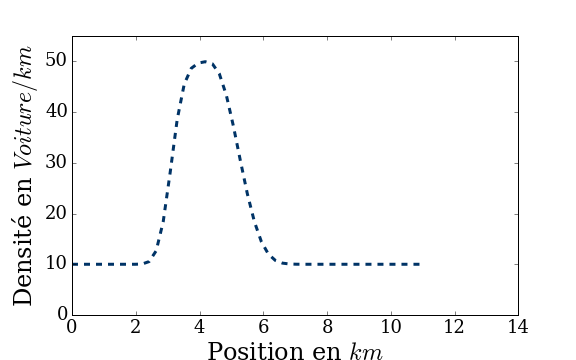
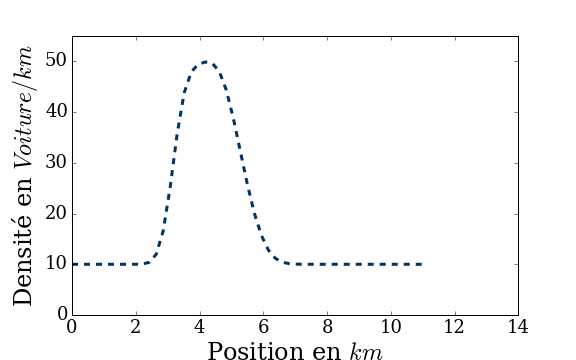
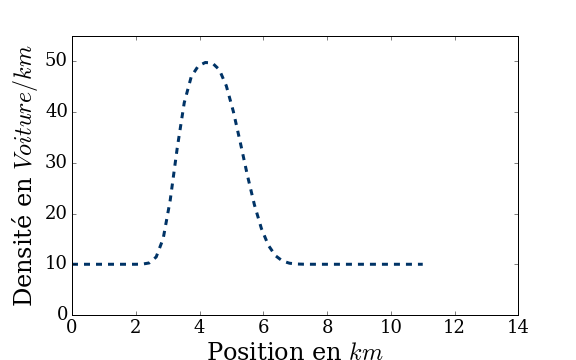
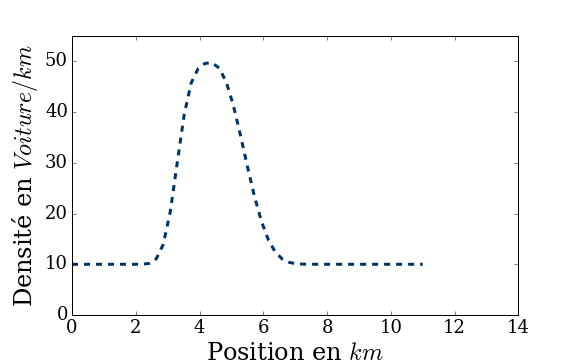
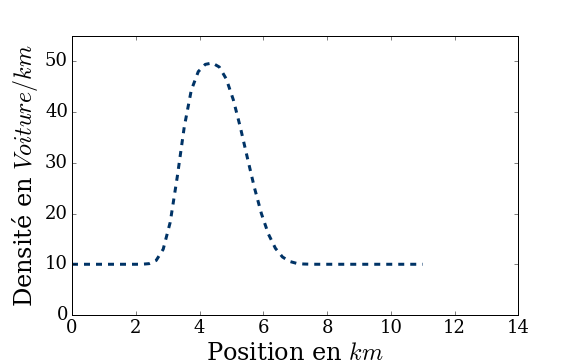
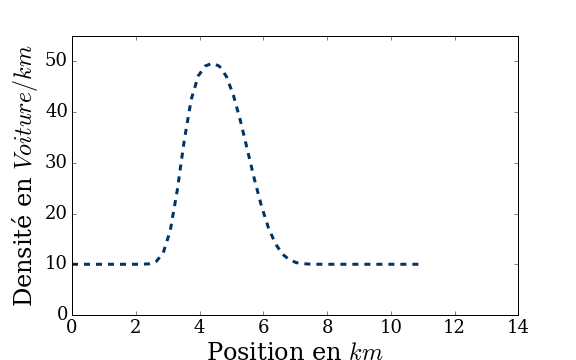
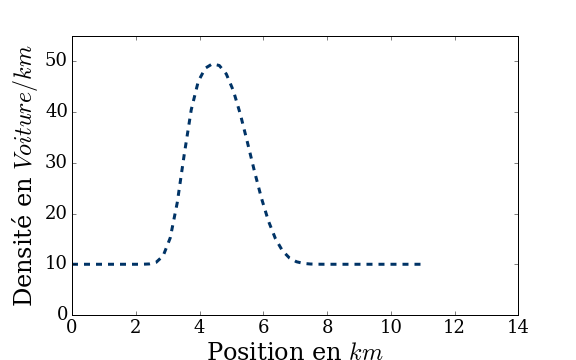
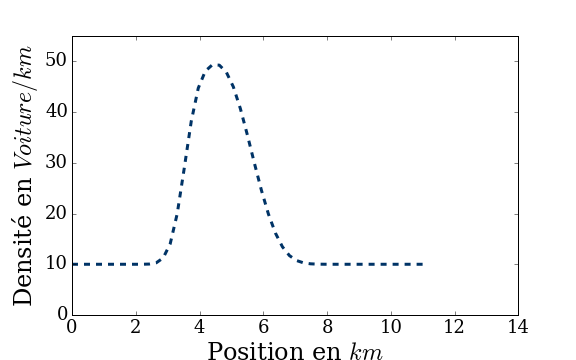
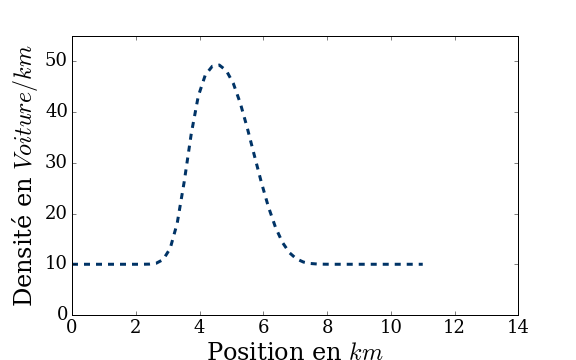
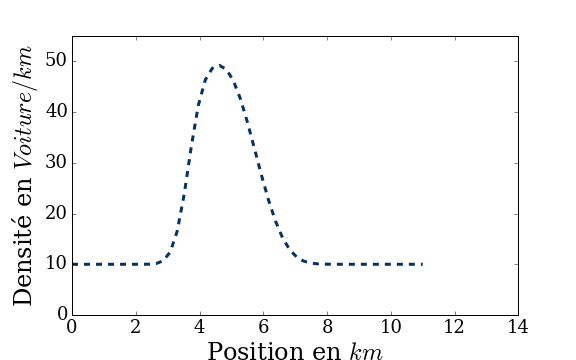
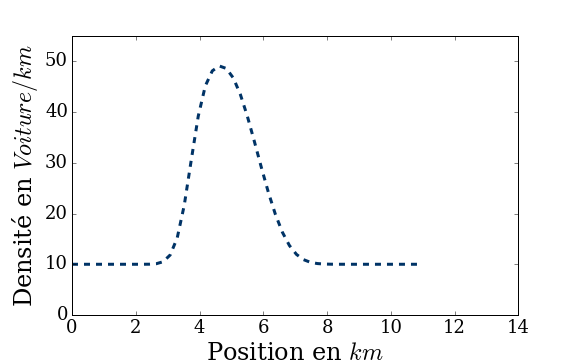
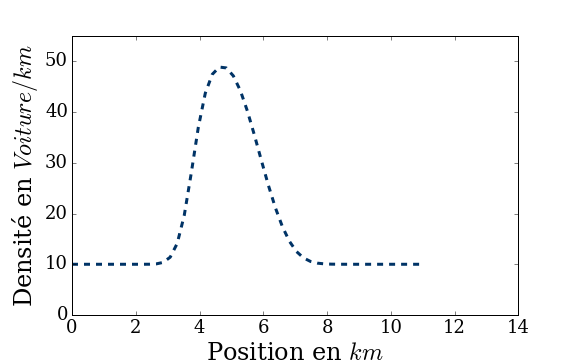
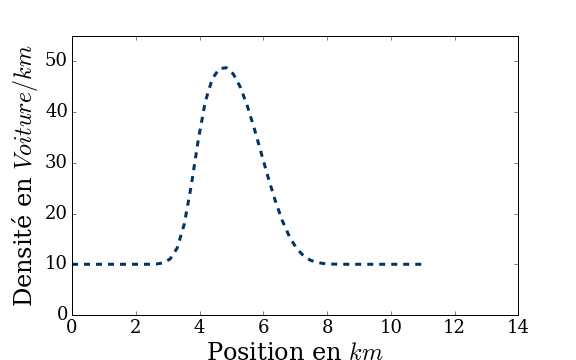
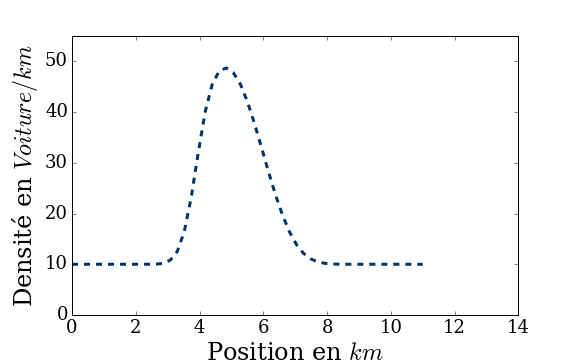
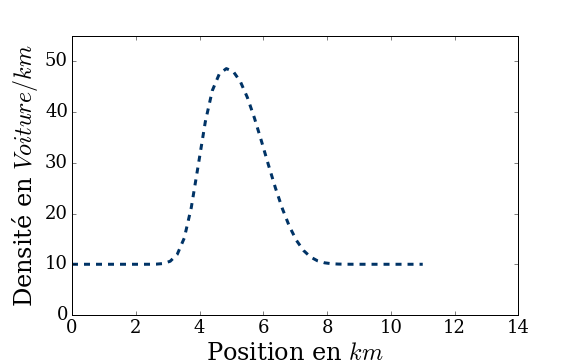
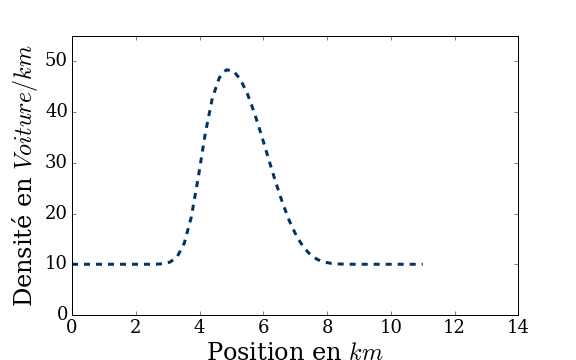
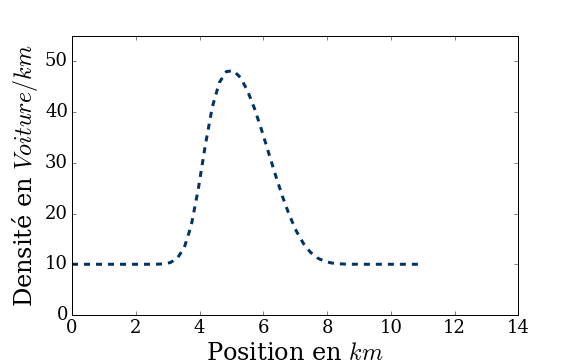
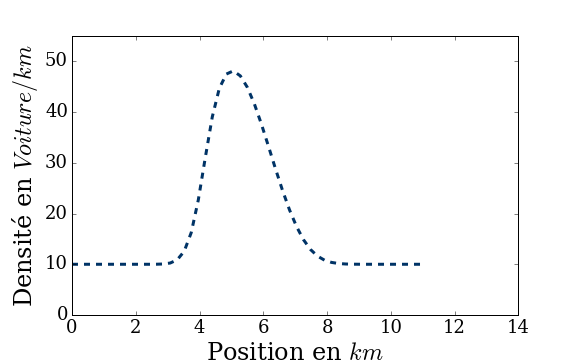
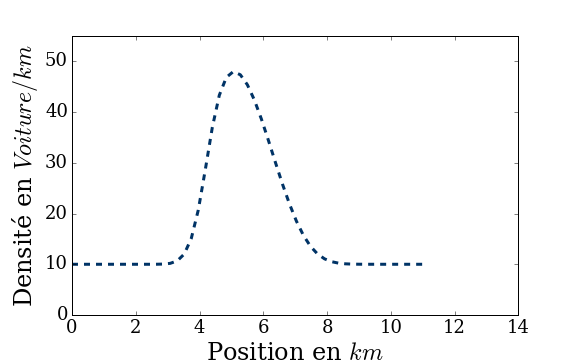
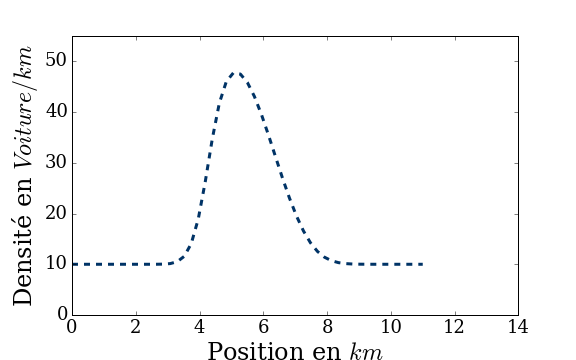
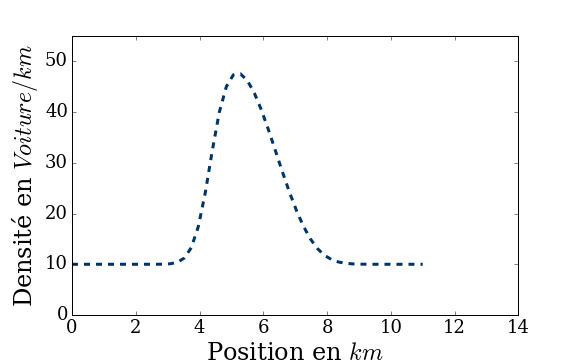
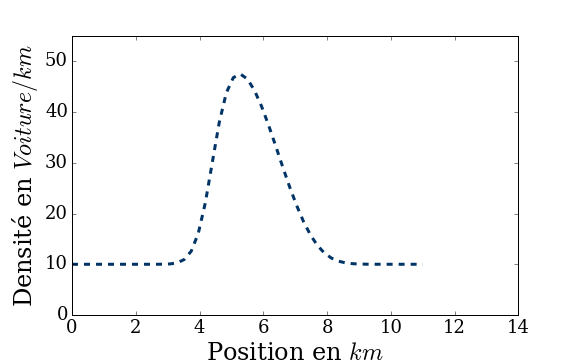
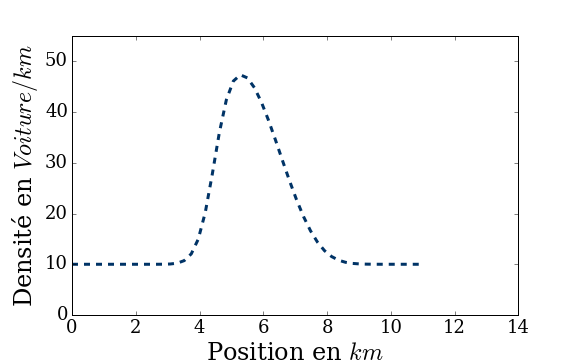
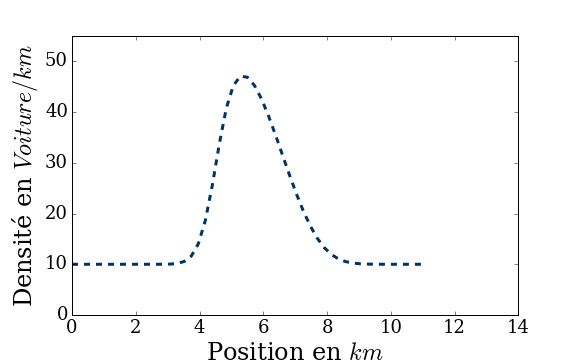
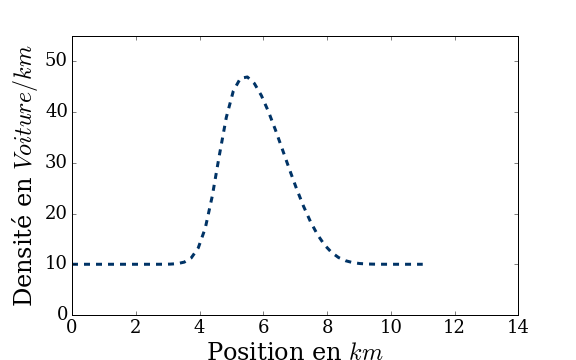
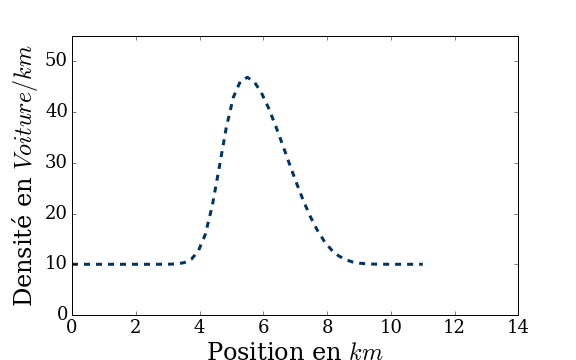
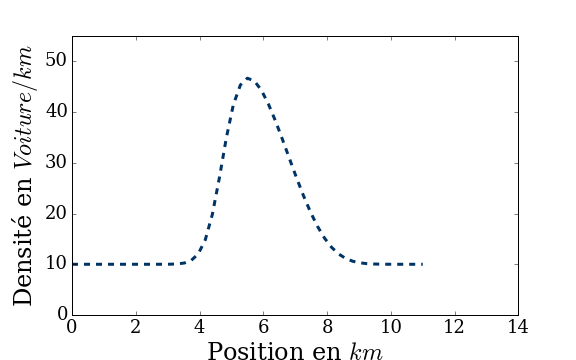
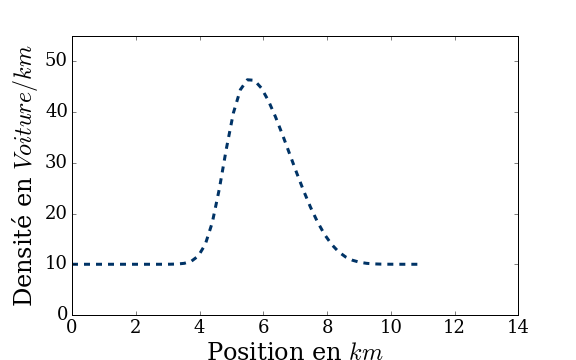
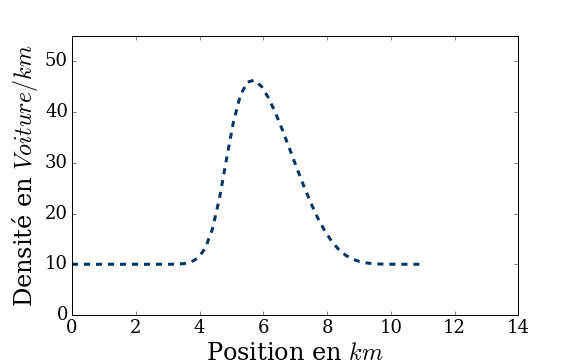
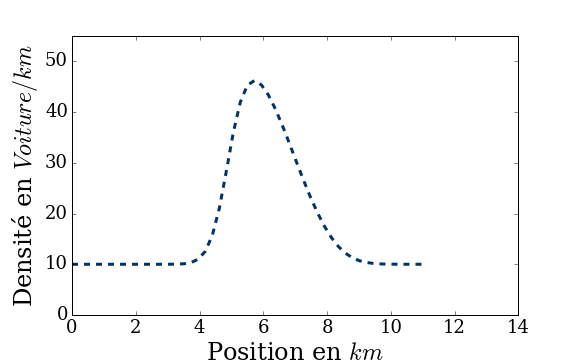
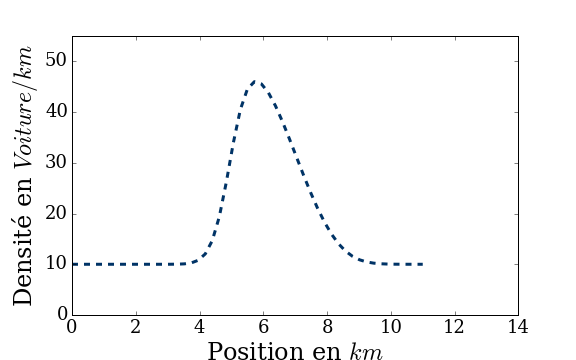
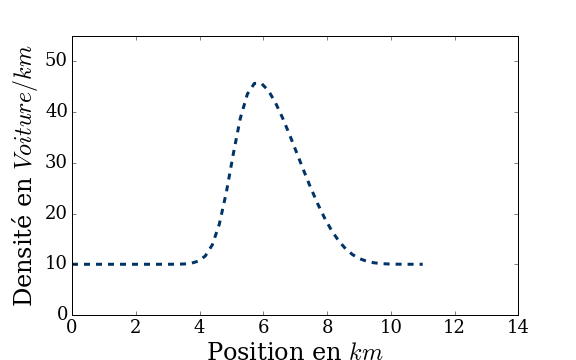
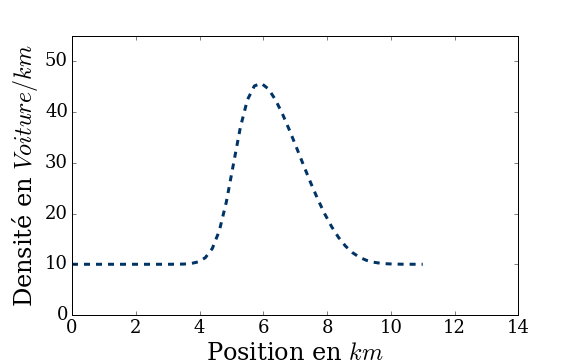
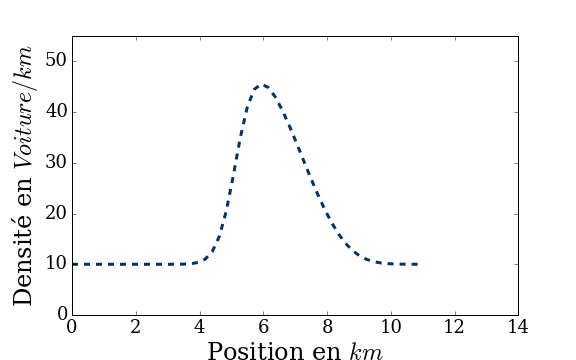
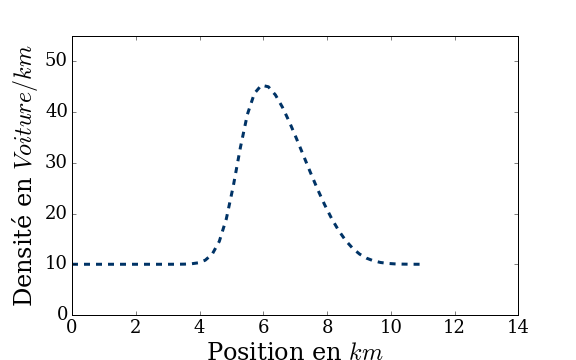
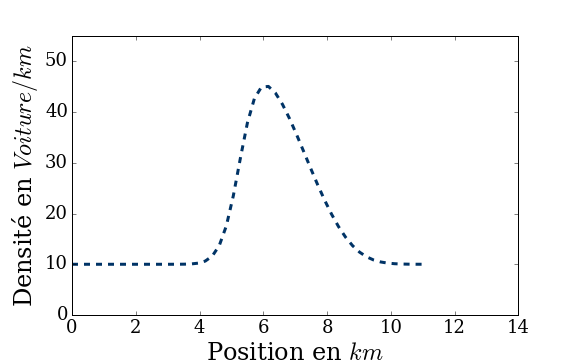

In [29]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,14), ylim=(0,55))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
pyplot.xlabel('Position en $km$',fontsize=24)
pyplot.ylabel('Densité en $Voiture/km$',fontsize=24)
pyplot.tick_params(axis='both',labelsize=18)


nt=int(t_sim/(dt*60))+1   # Nombre de point requis dans la grille pour la simulation

# On initialise notre liste des positions
x = numpy.linspace(0,L,nx)

# Nos conditions initiales
rho = numpy.ones(nx)*CL
rho[10:20] = 50
rho[0] = CL       # Notre condition au bord
    
def trafic(i):
    line.set_data(x,rho)
    rhon   = rho.copy()    # Notre première matrice densité est celle correspondant à nos conditions initiales.
    rho[1:] = rhon[1:]-((dt/dx)*v_max*((rhon[1:]*(1-(rhon[1:]/rho_max)))-(rhon[0:-1]*(1 - (rhon[0:-1]/rho_max)))))
    
animation.FuncAnimation(fig, trafic,frames=nt, interval=100)

---

#### Simulation Partie B - discrétisation de l'équation (3).
---

In [30]:
# Déclaration des variables

v_max = 136       # En km/h
CL    = 20       # Condition limite en voiture/km
t_sim = 3        # En min

# Déclaration d'un tableau qui va contenir les vitesses 
w=numpy.empty(3)


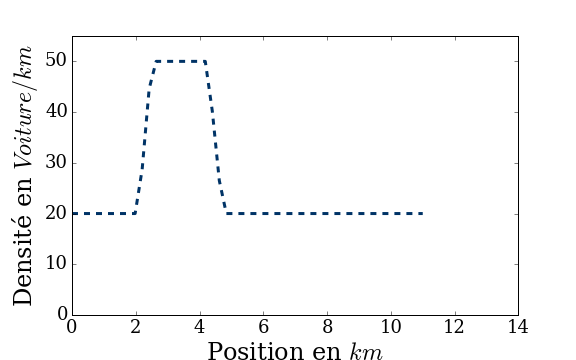
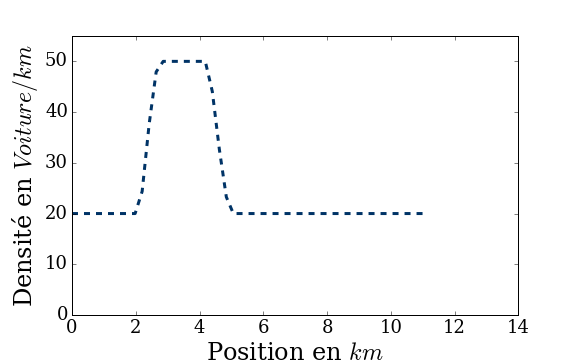
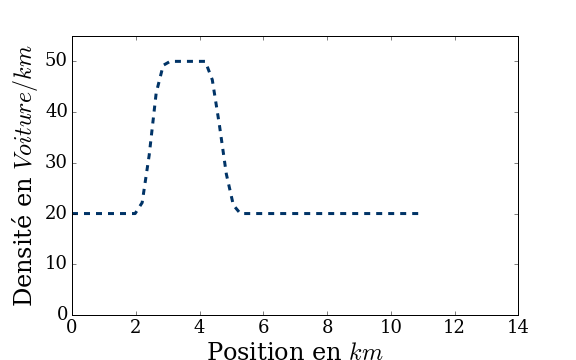
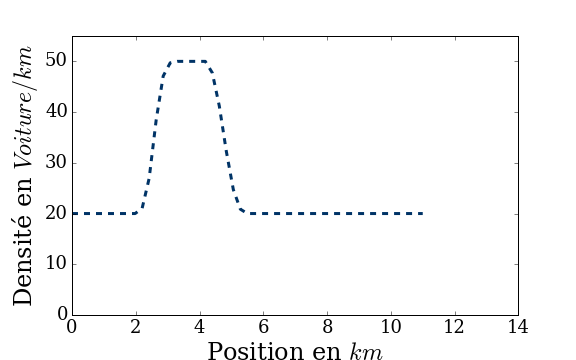
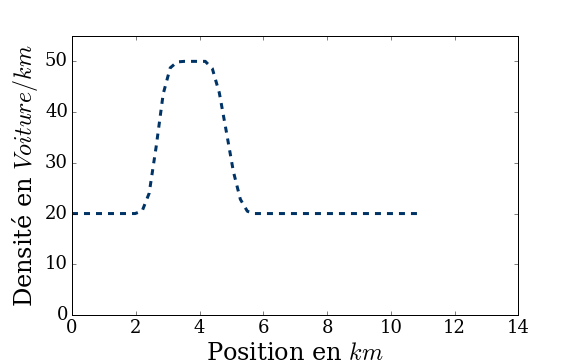
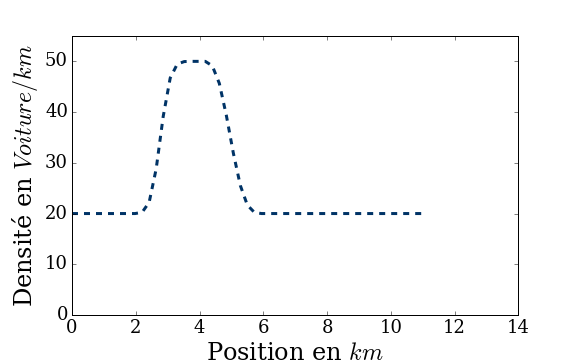
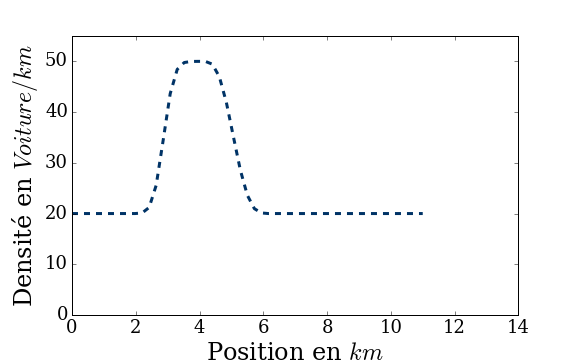
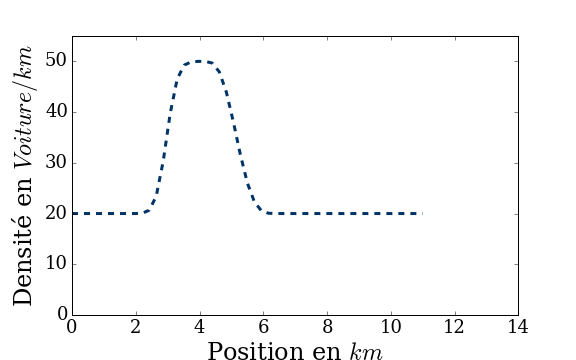
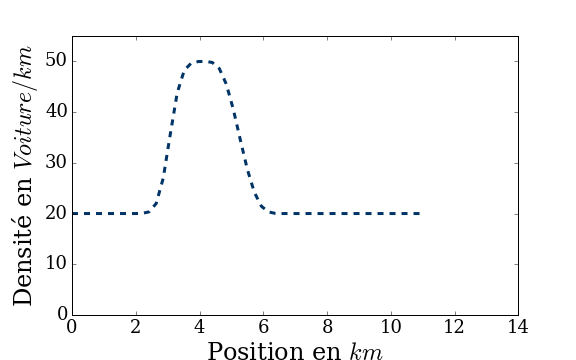
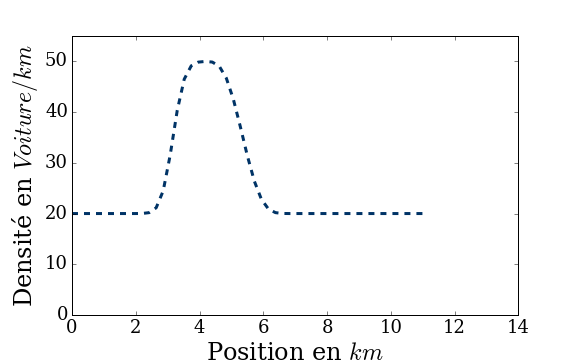
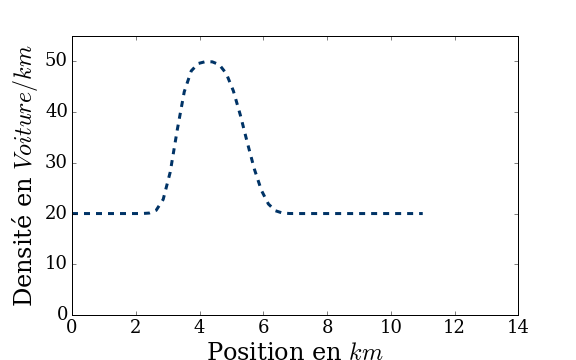
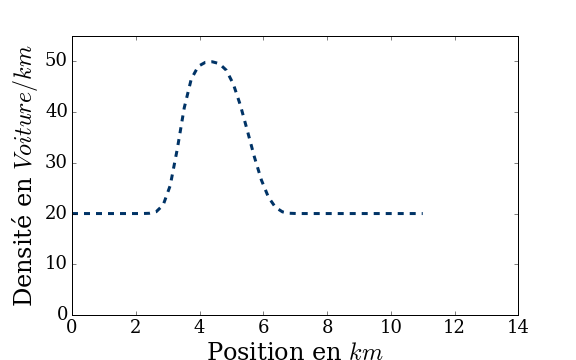
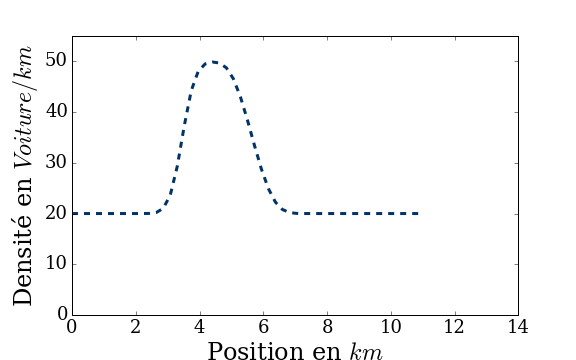
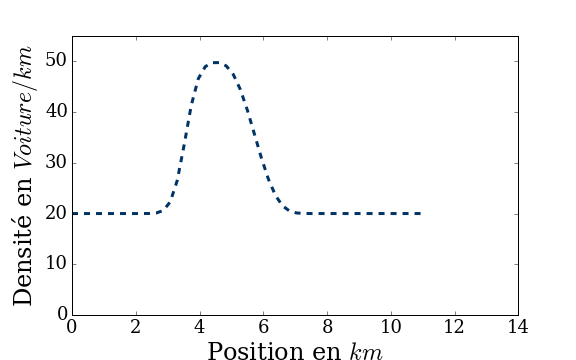
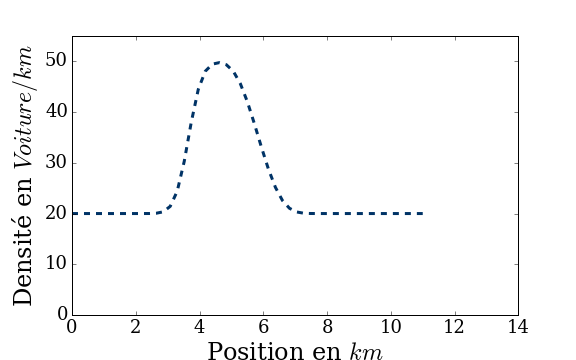
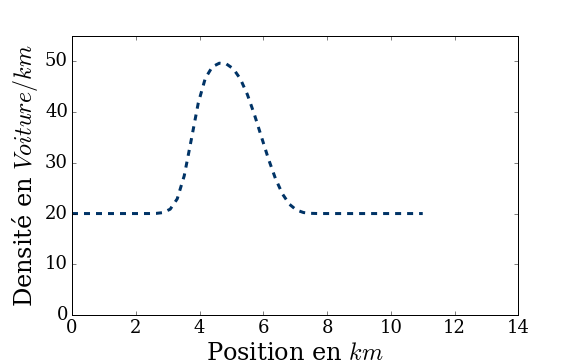
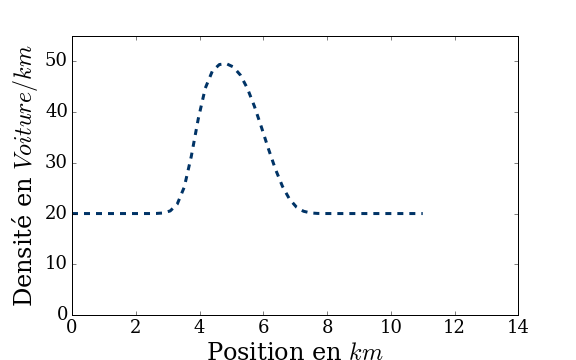
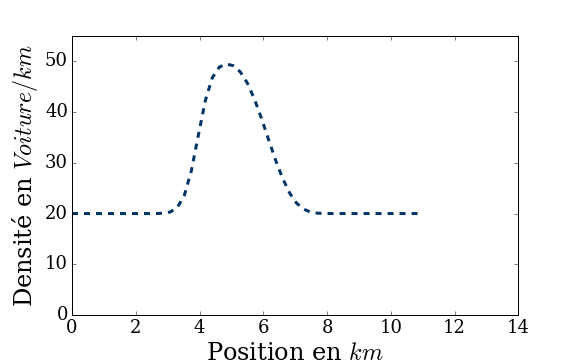
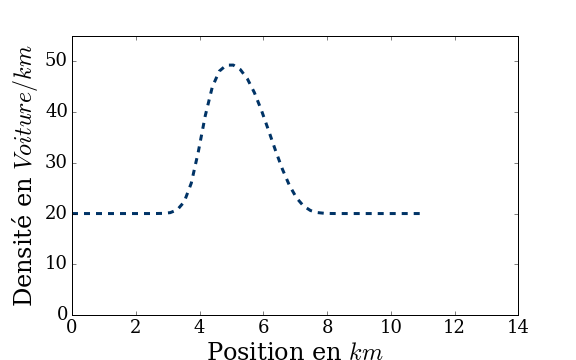
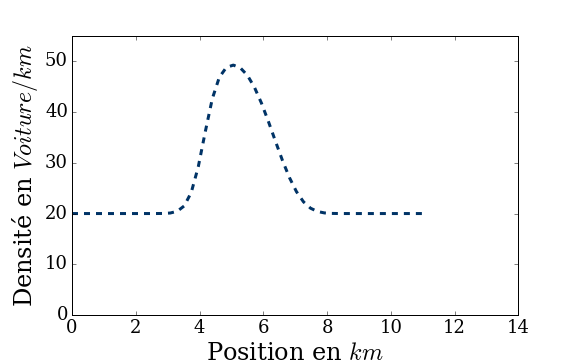
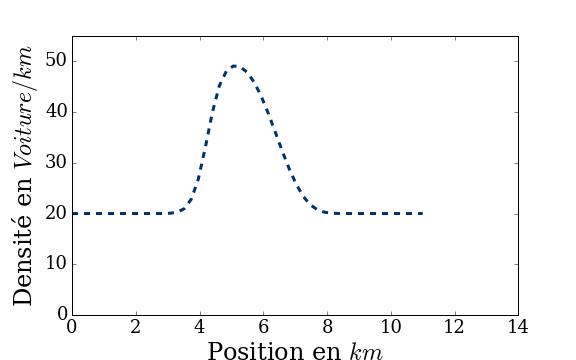
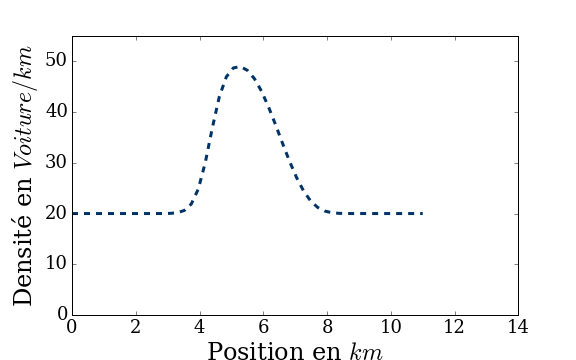
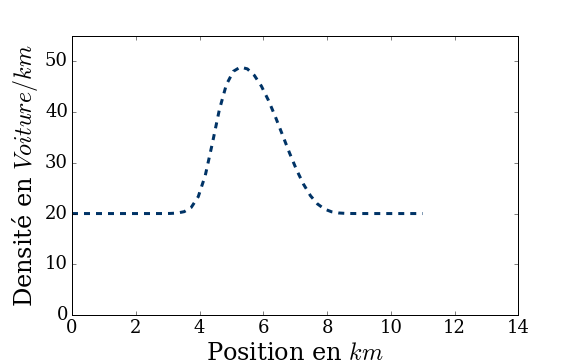
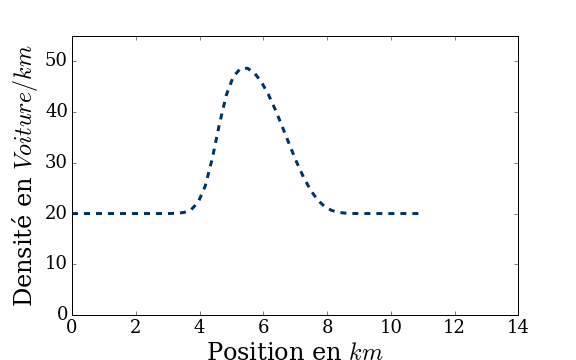
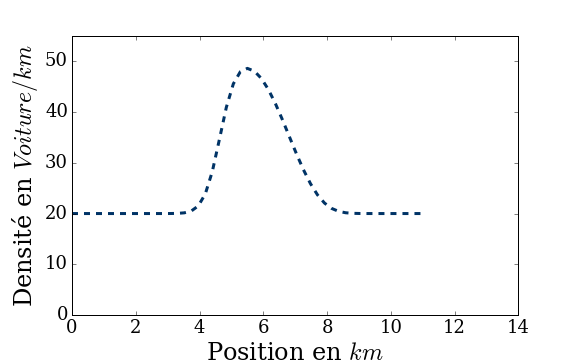
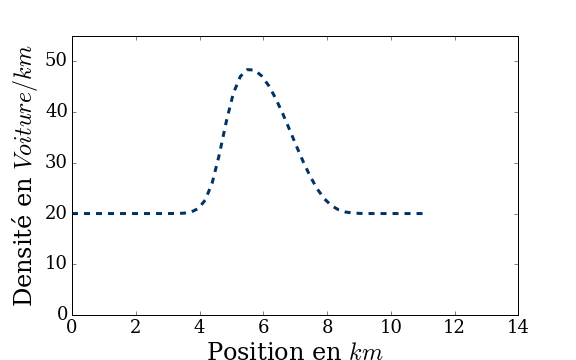
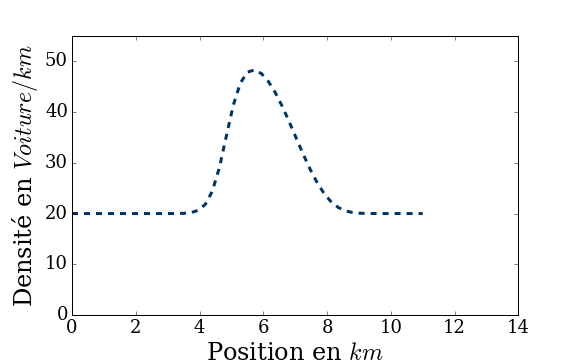
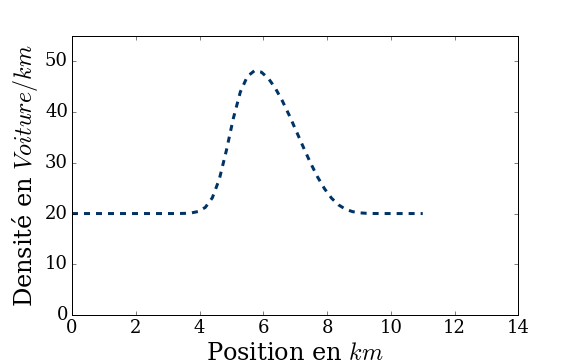
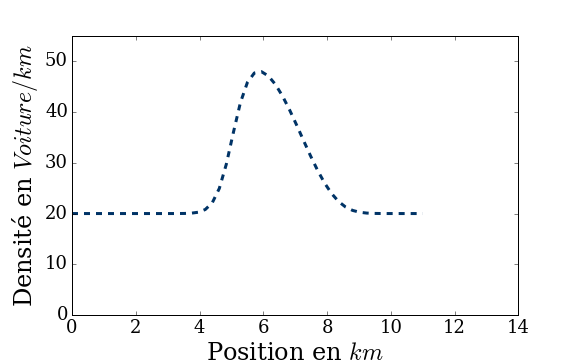
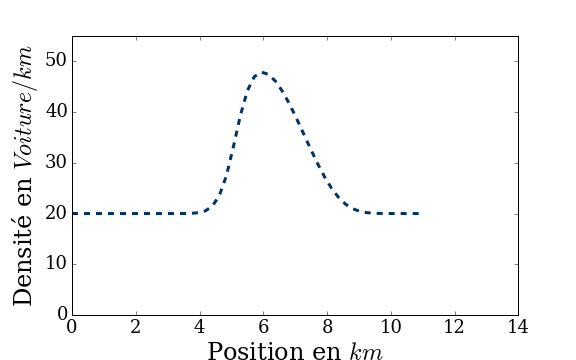
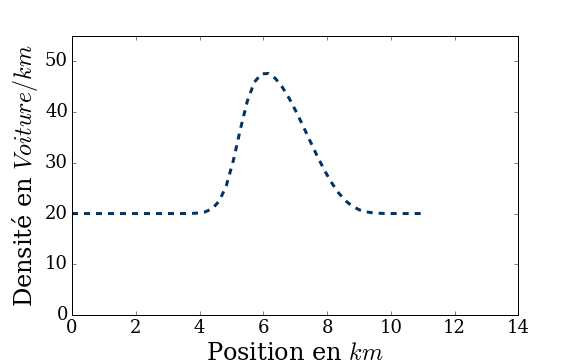
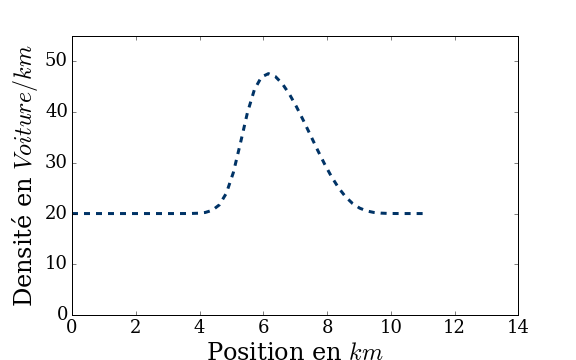
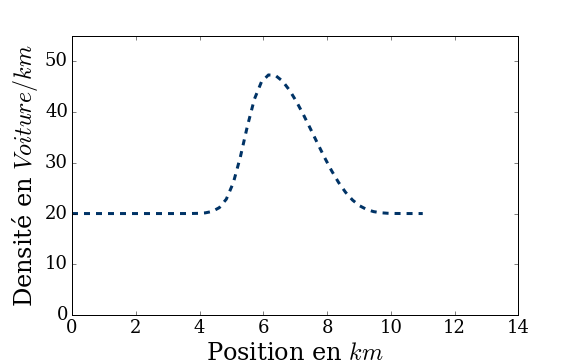
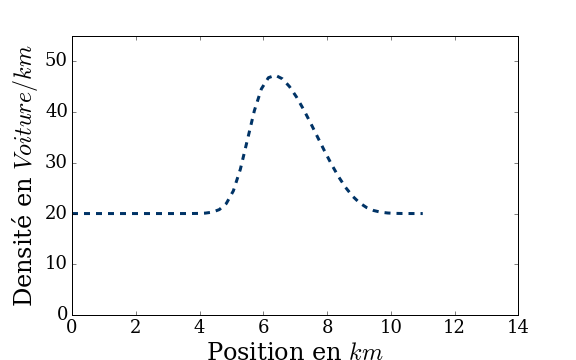
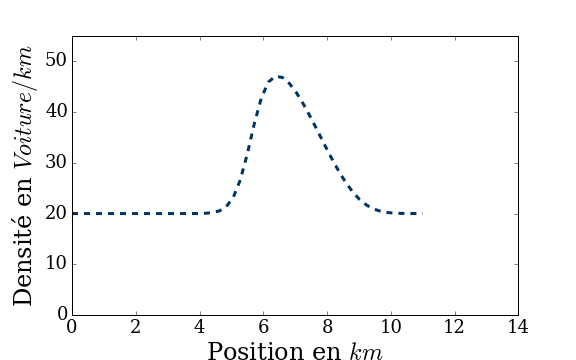
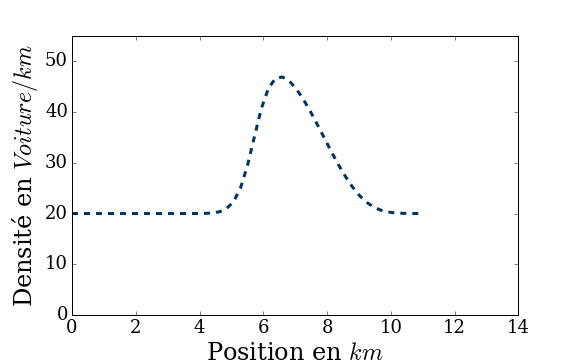
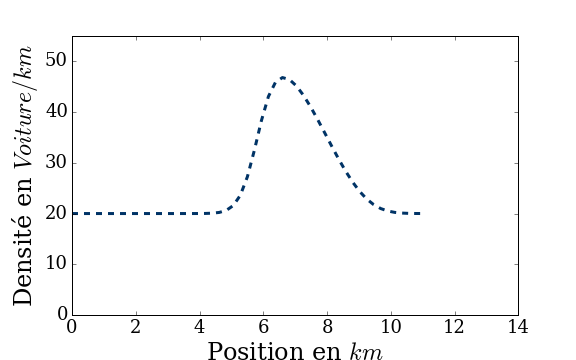
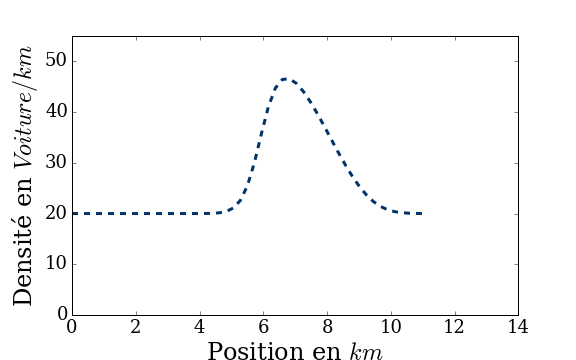
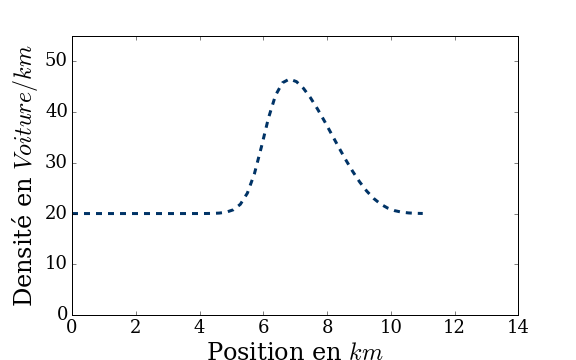
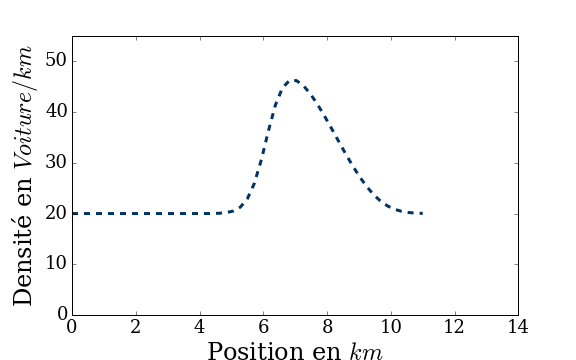
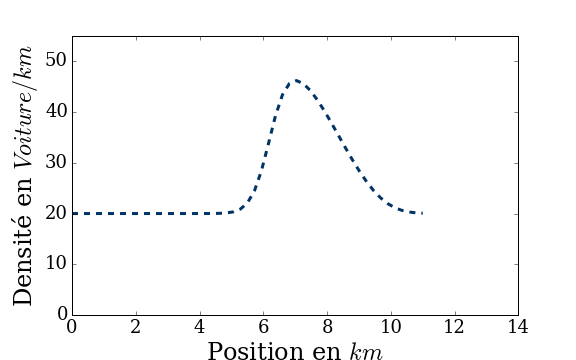
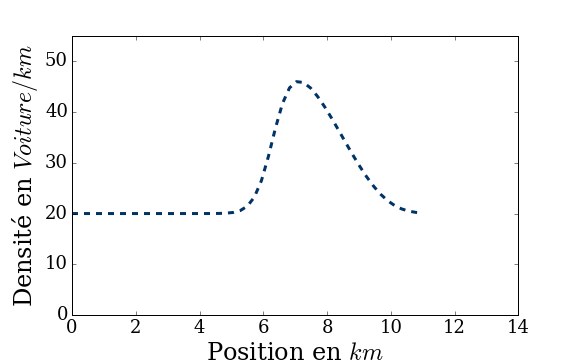
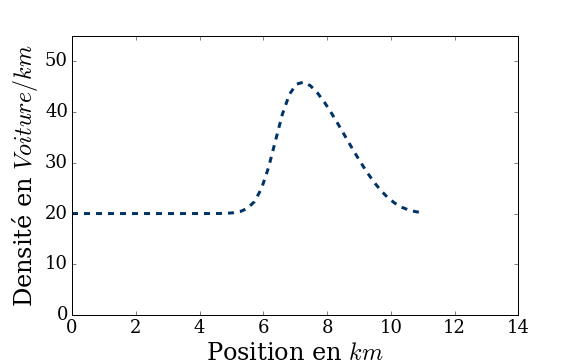
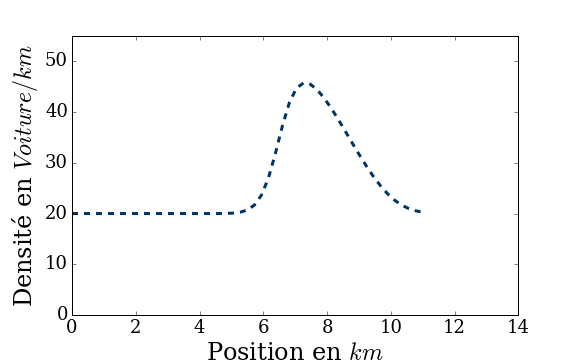
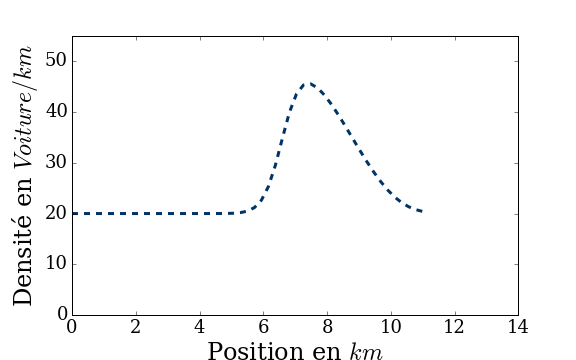
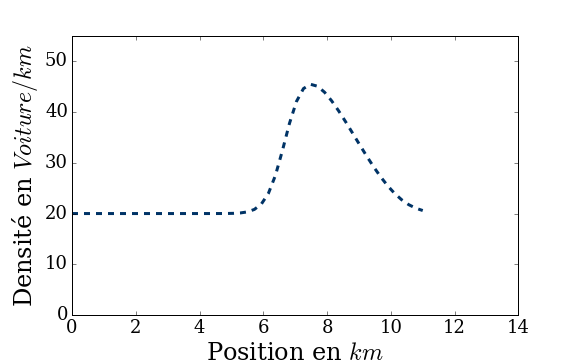
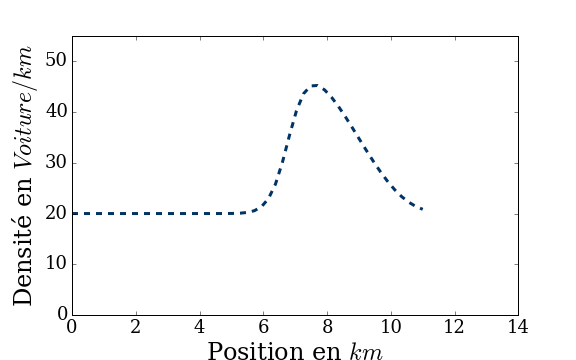
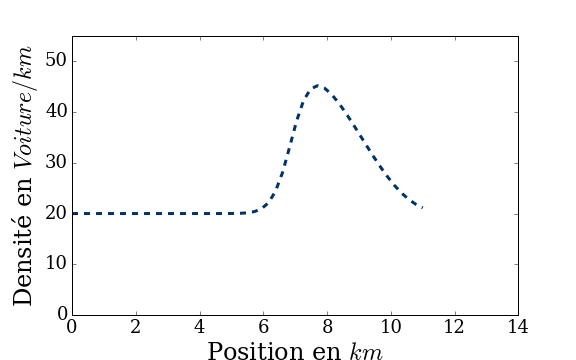
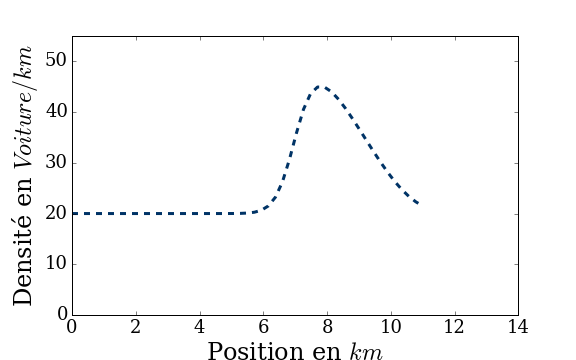
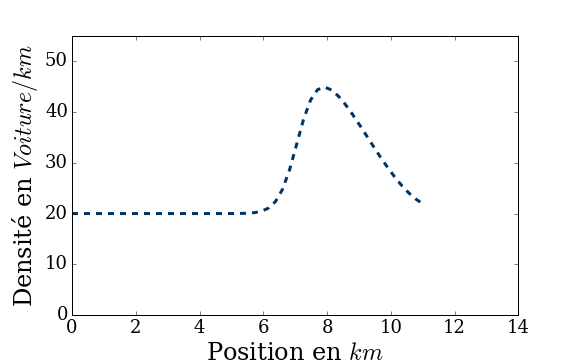
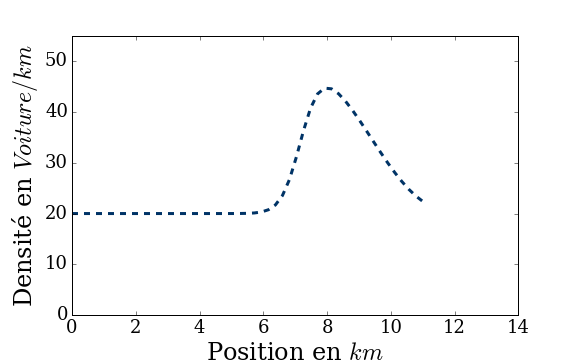

In [31]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,14), ylim=(0,55))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
pyplot.xlabel('Position en $km$',fontsize=24)
pyplot.ylabel('Densité en $Voiture/km$',fontsize=24)
pyplot.tick_params(axis='both',labelsize=18)


nt=int(t_sim/(dt*60))+1   # Nombre de point requis dans la grille pour la simulation

# On initialise notre liste des positions
x = numpy.linspace(0,L,nx)

# Nos conditions initiales
rho = numpy.ones(nx)*CL
rho[10:20] = 50
rho[0] = CL       # Notre condition au bord
    
def trafic(i):
    line.set_data(x,rho)
    rhon   = rho.copy()    # Notre première matrice densité est celle correspondant à nos conditions initiales.
    rho[1:] = rhon[1:]-((dt/dx)*v_max*((rhon[1:]*(1-(rhon[1:]/rho_max)))-(rhon[0:-1]*(1 - (rhon[0:-1]/rho_max)))))
    
animation.FuncAnimation(fig, trafic,frames=nt, interval=100)

Passons enfin à l'analyse des résultat obtenus.

---

##### 5. Analyse et comparaisons des résultats:
---

Résumer des résultats obtenus pour les deux discrétisation et ce pour les partie A et B:




Nous allons tout d'abord comparer les résultats obtenus dans chaque partie (A et B) pour une discrétisation donné puis pour chaque discrétisations. Nous verrons par la suite ce que nous pouvons en déduire. 

→ Comparaisons des résultats entre la partie A et B pour les deux discrétisations :

On constate que le changement des conditions aux bords (passage de 10 à 20 voiture/$km$) et une augmentation de la vitesse maximale du trafic implique une augmentation des valeurs pour les vitesses demandées.

→ Comparaisons des résultats obtenus à partir de deux discrétisations différentes :

---

##### 5. Source:
---


[1] Cours de MATH-F-101 (Calcul Différentiel et Intégral 1) présenté par M. Joel Fine et M. Denis Bonheure à l'ULB.

[2] Notebook *02.04 - 1D Burgers* de la série *Space and Time — Introduction to Finite-difference solutions of PDEs*

---

###### The cell below loads the style of the notebook.

In [32]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())